# Analysis of the White Wine Dataset

## Target for this Project

This wine dataset comes from wines from the northwest region of Portugal. It contains 4,898 white wines with 11 variables on the chemical properties for each wine. At least three sensory assessors graded the quality of each wine from a scale of 0 (very bad) to 10 (very excellent). The final sensory score given was the median for these evaluations.

### This Analysis is interested in answering these three major questions:

### 1) Which wine variables affect wine quality?
### 2) Which variables have the strongest correlation between each other?
### 3) Which variables have the strongest correlation with wine rating?


In [1]:
# Load the necessary libraries

# A powerful graphics language for creating elegant and complex plots
suppressMessages(library(ggplot2))

# A package that helps you transform tidy, tabular data
suppressMessages(library(dplyr))

# A graphical display of a correlation matrix, confidence interval.
suppressMessages(library(corrplot))

# Map data to aesthetics, and provide methods for automatically determining
# breaks and labels for axes and legends.
suppressMessages(library(scales))

#A package that reshapes the layout of tables.
suppressMessages(library(tidyr))

#  Extra themes, geoms, and scales for ggplot2
suppressMessages(library(ggthemes))

# Miscellaneous Functions for "Grid" Graphics
suppressMessages(library(gridExtra))

# Packages for Linear Modeling
suppressMessages(library(memisc))
suppressMessages(library(lattice))
suppressMessages(library(MASS))

#############################
# Reduce code with plotting functions:

smooth_lm <- stat_smooth(method = 'lm')
bv_jitter <- geom_jitter(alpha = 1/4, color = 'orange' )
set_geom <- geom_boxplot(alpha = 1/4, color = 'blue')
summary_line <- geom_smooth(method='lm', aes(group = 1), color = 'red')
mv_jitter <- geom_jitter(alpha = 1/3, aes(color = factor(whites$rating)))

f.a_x <- scale_x_continuous(limits = c(4, 11), breaks = seq(4, 11, 1)) #fixed.acidity
v.a_x <- scale_x_continuous(limits = c(0.1, 0.8), breaks = seq(0.1, 0.8, 0.1)) #vol.acidity
c.a_x <- scale_x_continuous(limits = c(0, 1), breaks = seq(0, 1, 0.1)) #citric.acid
r.s_x <- scale_x_continuous(limits = c(0, 24), breaks = seq(0, 24, 2)) #residual.sugar
r.s_lx <- scale_x_log10(breaks = seq(0, 24, 5)) #residual.sugar
r.s_lx2 <- scale_x_log10(breaks = seq(0, 24, 3)) #residual.sugar
chl_x <- scale_x_continuous(limits = c(0, 0.25), breaks = seq(0, 0.25, 0.05)) #chlorides
chl_lx <- scale_x_log10(breaks = seq(0, 0.25, 0.1)) #chlorides
chl_lx2 <- scale_x_log10(breaks = seq(0, 0.25, 0.05)) #chlorides
f.s.d_x <- scale_x_continuous(limits = c(0, 120), breaks = seq(0, 120, 10)) #free.sul.dio
t.s.d_x <- scale_x_continuous(limits = c(0, 300), breaks = seq(0, 300, 20)) #tot.sul.dio
d_x <- scale_x_continuous(limits = c(0.9871, 1.0)) #density
pH_x <- scale_x_continuous(limits = c(2.7, 3.82), breaks = seq(2.7, 3.82, 0.1)) #pH
sul_x <- scale_x_continuous(limits = c(0.22, 1.08), breaks = seq(0.22, 1.08, 0.1)) #sulphate
alc_x <- scale_x_continuous(limits = c(8, 14.2), breaks = seq(8, 14.2, 1)) #alcohol

f.a_y <- scale_y_continuous(limits = c(4, 11), breaks = seq(4, 11, 1)) #fixed.acidity
v.a_y <- scale_y_continuous(limits = c(0.1, 0.8), breaks = seq(0.1, 0.8, 0.1)) #vol.acidity
c.a_y <- scale_y_continuous(limits = c(0, 1), breaks = seq(0, 1, 0.1)) #citric.acid
r.s_y <- scale_y_continuous(limits = c(0, 24), breaks = seq(0,24, 2)) #residual.sugar
r.s_ly <- scale_y_log10(breaks = seq(0, 24, 5)) #residual.sugar
r.s_ly2 <- scale_y_log10(breaks = seq(0, 24, 3)) #residual.sugar
chl_y <- scale_y_continuous(limits = c(0, 0.25), breaks = seq(0, 0.25, 0.05)) #chlorides
chl_ly <- scale_y_log10(breaks = seq(0, 0.25, 0.1)) #chlorides
chl_ly2 <- scale_y_log10(breaks = seq(0, 0.25, 0.05)) #chlorides
f.s.d_y <- scale_y_continuous(limits = c(0, 120), breaks = seq(0, 120, 10)) #free.sul.dio
t.s.d_y <- scale_y_continuous(limits = c(0, 300), breaks = seq(0, 300, 20)) #tot.sul.dio
d_y <- scale_y_continuous(limits = c(0.9871, 1.0)) #density
pH_y <- scale_y_continuous(limits = c(2.7, 3.82), breaks = seq(2.7, 3.82, 0.1)) #pH
sul_y <- scale_y_continuous(limits = c(0.22, 1.08), breaks = seq(0.22, 1.08, 0.1)) #sulphate
alc_y <- scale_y_continuous(limits = c(8, 14.2), breaks = seq(8, 14.2, 1)) #alcohol

# X - Y Labels
f.a_xlab <- xlab('Fixed Acidity (g(tartaric acid)/dm^3)')
v.a_xlab <- xlab('Volatile Acidity (g(acetic acid)/dm^3)')
c.a_xlab <- xlab('Citric Acid (g/dm)')
r.s_xlab <- xlab('Residual Sugar (g/dm^3)')
r.s_lxlab <- xlab('Residual Sugar, log10 (g/dm^3)')
chl_xlab <- xlab('Chlorides (g(sodium chloride/dm^3)')
chl_lxlab <- xlab('Chlorides, log10 (g(sodium chloride/dm^3)')
f.s.d_xlab <- xlab('Free Sulfur Dioxide (mg/dm^3)')
t.s.d_xlab <- xlab('Total Sulfur Dioxide (mg/dm^3)')
d_xlab <- xlab('Density (g/cm^3)')
sul_xlab <- xlab('Sulphates (g(potassium sulphate)/dm^3)')
alc_xlab <- xlab('Alcohol (vol%)')
qual_xlab <- xlab('Quality')
qual_ylab <- ylab('Quality')

f.a_ylab <- ylab('Fixed Acidity (g(tartaric acid)/dm^3)')
v.a_ylab <- ylab('Volatile Acidity (g(acetic acid)/dm^3)')
c.a_ylab <- ylab('Citric Acid (g/dm)')
r.s_ylab <- ylab('Residual Sugar (g/dm^3)')
r.s_lylab <- ylab('Residual Sugar, log10 (g/dm^3)')
chl_ylab <- ylab('Chlorides (g(sodium chloride/dm^3)')
chl_lylab <- ylab('Chlorides, log10 (g(sodium chloride/dm^3)')
f.s.d_ylab <- ylab('Free Sulfur Dioxide (mg/dm^3)')
t.s.d_ylab <- ylab('Total Sulfur Dioxide (mg/dm^3)')
d_ylab <- ylab('Density (g/cm^3)')
sul_ylab <- ylab('Sulphates (g(potassium sulphate)/dm^3)')
alc_ylab <- ylab('Alcohol (vol%)')
ycount <- ylab('Wines')


In [2]:
#getwd() # Show path to local files

# Understanding the The Dataset and Wine Variables

In [3]:
whites <- read.csv('wineQualityWhites.csv') # Read in the white wine dataset

dim(whites) # Get the dimensions of the dataset

names(whites) # Get the names of the columns of the dataset

head(whites, 3) # Get the first three rows of the dataset

tail(whites, 3) # Get the last three rows of the dataset

[1] 4898   13

[1] "X"                    "fixed.acidity"        "volatile.acidity"    
 [4] "citric.acid"          "residual.sugar"       "chlorides"           
 [7] "free.sulfur.dioxide"  "total.sulfur.dioxide" "density"             
[10] "pH"                   "sulphates"            "alcohol"             
[13] "quality"

X fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
1 1 7.0           0.27             0.36        20.7           0.045    
2 2 6.3           0.30             0.34         1.6           0.049    
3 3 8.1           0.28             0.40         6.9           0.050    
  free.sulfur.dioxide total.sulfur.dioxide density pH   sulphates alcohol
1 45                  170                  1.0010  3.00 0.45       8.8   
2 14                  132                  0.9940  3.30 0.49       9.5   
3 30                   97                  0.9951  3.26 0.44      10.1   
  quality
1 6      
2 6      
3 6

X    fixed.acidity volatile.acidity citric.acid residual.sugar chlorides
4896 4896 6.5           0.24             0.19        1.2            0.041    
4897 4897 5.5           0.29             0.30        1.1            0.022    
4898 4898 6.0           0.21             0.38        0.8            0.020    
     free.sulfur.dioxide total.sulfur.dioxide density pH   sulphates alcohol
4896 30                  111                  0.99254 2.99 0.46       9.4   
4897 20                  110                  0.98869 3.34 0.38      12.8   
4898 22                   98                  0.98941 3.26 0.32      11.8   
     quality
4896 6      
4897 7      
4898 6


## Description of the Wine Variables:
### (As cited in the dataset notes along with a few extra remarks)

- Fixed acidity: most acids involved with wine are fixed or nonvolatile (do not evaporate readily)

- Volatile acidity: the amount of acetic acid + ethyl acetate in wine, which at too high of levels can lead to an unpleasant, vinegar taste - the lower the better.

- Citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines

- Residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

- Chlorides: the amount of salt in the wine

- Free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

- Total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

- Density: the density of wine is close to that of water depending on the percent alcohol and sugar content. It correlates with the concentration of glycerol and tannins too.

- pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale. It correlates with "freshness" (acidity) in the mouth.

- Sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, and acts as an antimicrobial and antioxidant.

- Alcohol: the percent alcohol content of the wine. Higher for red wines than whites.

- Quality: output variable (based on sensory data - score between 0 and 10)


In [4]:
summary(whites) # display result summaries of dataset


       X        fixed.acidity    volatile.acidity  citric.acid    
 Min.   :   1   Min.   : 3.800   Min.   :0.0800   Min.   :0.0000  
 1st Qu.:1225   1st Qu.: 6.300   1st Qu.:0.2100   1st Qu.:0.2700  
 Median :2450   Median : 6.800   Median :0.2600   Median :0.3200  
 Mean   :2450   Mean   : 6.855   Mean   :0.2782   Mean   :0.3342  
 3rd Qu.:3674   3rd Qu.: 7.300   3rd Qu.:0.3200   3rd Qu.:0.3900  
 Max.   :4898   Max.   :14.200   Max.   :1.1000   Max.   :1.6600  
 residual.sugar     chlorides       free.sulfur.dioxide total.sulfur.dioxide
 Min.   : 0.600   Min.   :0.00900   Min.   :  2.00      Min.   :  9.0       
 1st Qu.: 1.700   1st Qu.:0.03600   1st Qu.: 23.00      1st Qu.:108.0       
 Median : 5.200   Median :0.04300   Median : 34.00      Median :134.0       
 Mean   : 6.391   Mean   :0.04577   Mean   : 35.31      Mean   :138.4       
 3rd Qu.: 9.900   3rd Qu.:0.05000   3rd Qu.: 46.00      3rd Qu.:167.0       
 Max.   :65.800   Max.   :0.34600   Max.   :289.00      Max.   :440.0

### Analysis of the Dataset and Wine Variables
- The dataset contains 4898 white wines and 12 input variables.
- The above table shows the distribution of data over different variables. The mean values for a few variables are listed:

- alcohol = 10.51
- citric acid = 0.3342
- density = 0.9940
- pH = 3.188
- quality = 5.878
- residual sugar = 6.391


# 1- Univariate Plots and Analysis

## Plotting the Wine Variables

- We'll plot each variable to get a basic understanding of them to the dataset.

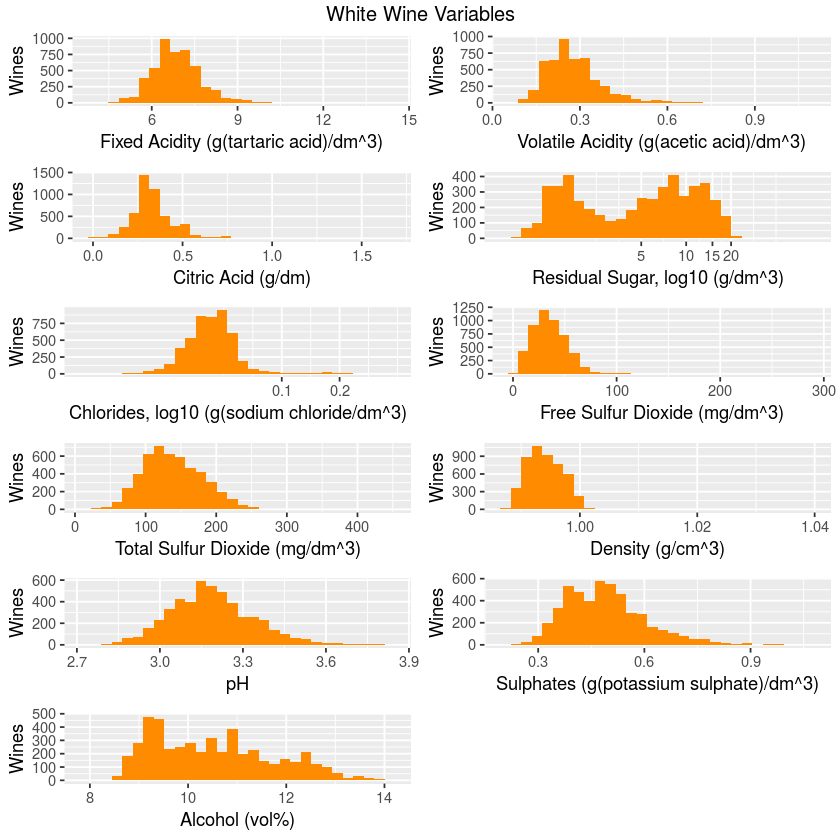

In [5]:
p2 = ggplot(aes(x = fixed.acidity), data = whites) + geom_histogram(fill = 'darkorange') + ycount + f.a_xlab
p3 = ggplot(aes(x = volatile.acidity), data = whites) + geom_histogram(fill = 'darkorange') + ycount + v.a_xlab
p4 = ggplot(aes(x = citric.acid), data = whites) + geom_histogram(fill = 'darkorange') + ycount + c.a_xlab
p5 = ggplot(aes(x = residual.sugar), data = whites) + geom_histogram(fill = 'darkorange') + ycount + r.s_lx + r.s_lxlab
p6 = ggplot(aes(x = chlorides), data = whites) + geom_histogram(fill = 'darkorange') + ycount +  chl_lx + chl_lxlab
p7 = ggplot(aes(x = free.sulfur.dioxide), data = whites) + geom_histogram(fill = 'darkorange') + ycount + f.s.d_xlab
p8 = ggplot(aes(x = total.sulfur.dioxide), data = whites) + geom_histogram(fill = 'darkorange') + ycount + t.s.d_xlab
p9 = ggplot(aes(x = density), data = whites) + geom_histogram(fill = 'darkorange') + ycount + d_xlab
p10 = ggplot(aes(x = pH), data = whites) + geom_histogram(fill = 'darkorange') + ycount
p11 = ggplot(aes(x = sulphates), data = whites) + geom_histogram(fill = 'darkorange') + ycount + sul_xlab
p12 = ggplot(aes(x = alcohol), data = whites) + geom_histogram(fill = 'darkorange') + ycount + alc_xlab

suppressMessages(grid.arrange(p2, p3, p4, p5, p6, p7, p8, p9, p10, p11,
            p12, ncol = 2, top="White Wine Variables"))


### Analysis of Plotting the Wine Variables
#### We used histograms to display each wine variable to learn about the dataset. Bar charts are a great way to display a single categorical variable like we have here. I'll summarized a few points below.
- Most of the wines have a pH between 2.85 and 3.6.
- The alcohol content is between 8.5 and 13.5 percent.

#### These graphs are in agreement with the dataset summary.


# Understanding Wine Quality
## Wine Quality by the Numbers

In [6]:
table(whites$quality)


   3    4    5    6    7    8    9 
  20  163 1457 2198  880  175    5 

## Statistics for Wine Quality

In [7]:
# If na.rm is TRUE then missing values are removed before computation proceeds

qual_min <- min(whites$quality, na.rm = TRUE) # Calculate the minimum
qual_max <- max(whites$quality, na.rm = TRUE) # Calculate the maximum
qual_mean <- mean(whites$quality, na.rm = TRUE) # Calculate the mean
qual_trim_mean <- mean(whites$quality, trim = 0.10, na.rm = TRUE) # The trimmed mean
qual_median <- median(whites$quality, na.rm = TRUE) # Calculate the median
qual_sd <- sd(whites$quality, na.rm = TRUE) # Calculate the standard deviation
qual_quantile <- quantile(whites$quality) # Calculates quantile
qual_IQR <- IQR(whites$quality) # Calculates interquartile range (IQR = Q3 - Q1)

# quality <- as.numeric(whites$quality)

qual_min
qual_max
qual_mean
qual_trim_mean
qual_sd


[1] 3

[1] 9

[1] 5.877909

[1] 5.852041

[1] 0.8856386

## Plotting Wine Quality

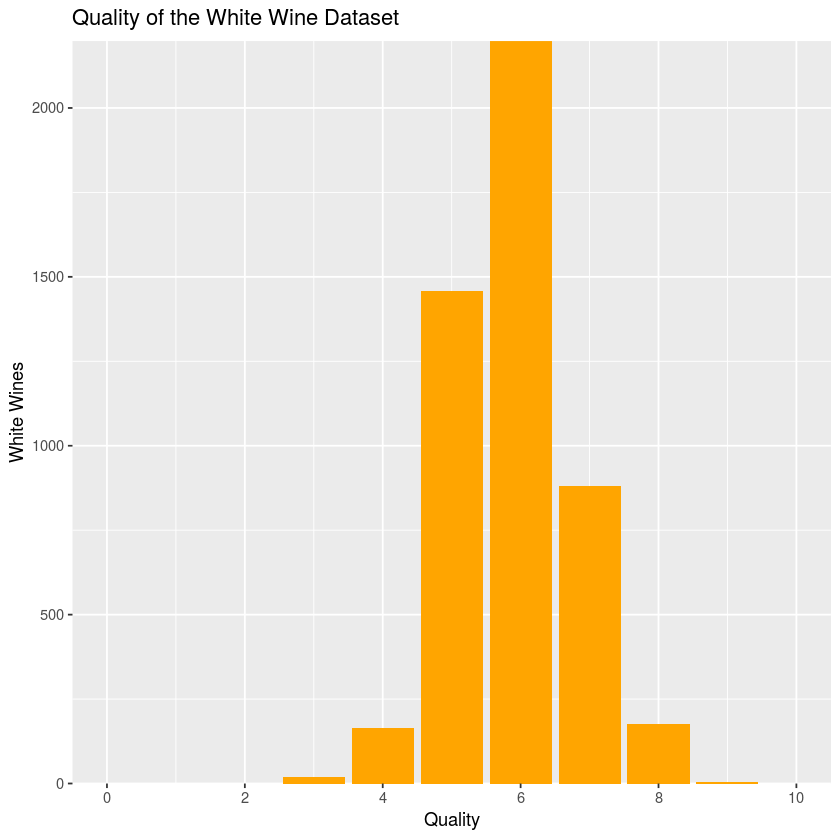

In [8]:
ggplot(aes(quality), data = whites) + geom_bar(fill = 'orange') +
    scale_x_continuous(limits = c(0, 10), 'Quality', breaks = seq(0, 10, by = 2)) +
    scale_y_continuous(expand = c(0, 0), 'White Wines') + 
    ggtitle('Quality of the White Wine Dataset')


#### Most of the wines have a wine quality centered around 4, 5, 6, 7, 8. When we start our analysis, we'll regroup these to help make the analysis better.

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”

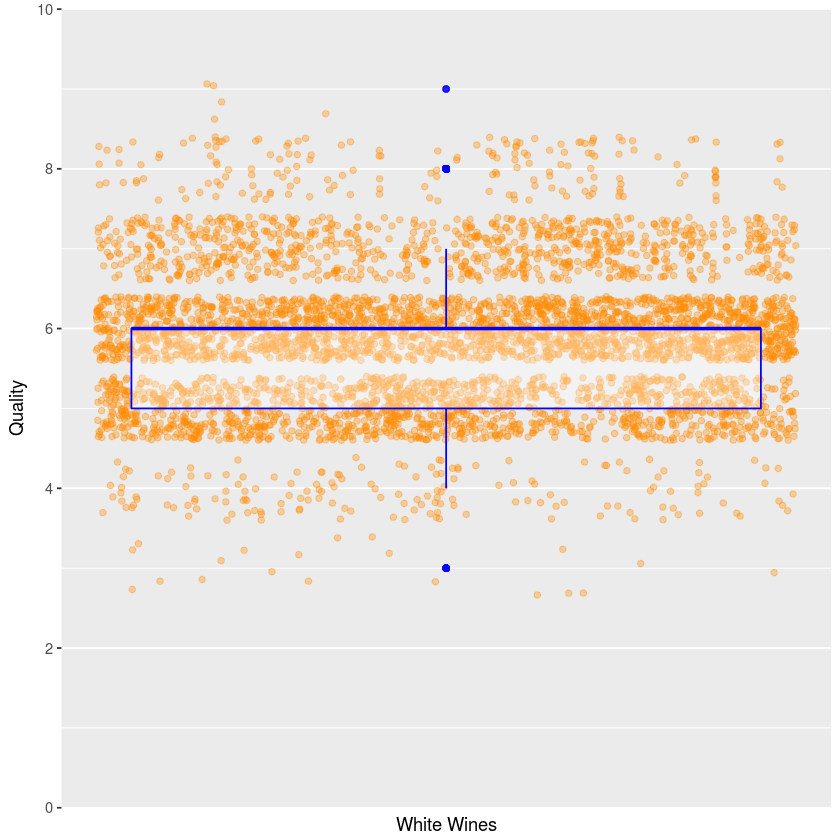

In [9]:
ggplot(aes(x = X, y = quality), data = whites) + 
    geom_jitter(alpha = 1/3, color = 'darkorange') +
    geom_boxplot(alpha = 1/3, color = 'blue') +
    scale_y_continuous(limits = c(0,10), 'Quality', expand = c(0,0), breaks=seq(0, 10, by = 2)) +
    scale_x_continuous(breaks = NULL) +
    xlab('White Wines')

In [10]:
qual_median
qual_quantile


[1] 6

0%  25%  50%  75% 100% 
   3    5    6    6    9

#### The boxplot shows the median distribution, the 75th and the 25th percentiles. The median is shown by the heavy horizontal line in the box. The two blue whiskers extended from the top & the bottom indicate the range for the bulk of the data. The graph also shows a few outliers.

### Analysis of Wine Quality

- Most of the wines have a wine quality centered around 4, 5, 6, 7, 8.

- Since the values for the mean and the mode are close to one another, this suggests that there isn't many outliers influencing the dataset. Additionally, since standard deviation is small, we can assume that the data points are centered near the mean. Standard deviation is especially sensitive to outliers since it's based on the squared deviations. Additionally, since the trim_mean is similar to the mean, this is another indicator that there isn't many outliers. As stated above, there are a few outliers and we will remove them where necessary.

- The plots of the wine quality are in agreement with the statistics.


# 2- Bivariate Plots and Analysis
## Understanding Wine Quality Vs. Wine Variables

- Table: Correlation between Quality and Chemical Variables

- Graphs: Plotting Wine Quality to each Variable

    - Together they will give us a sense of which variables are influencing the wine quality the most.
    
- For the correlation coefficient, we'll use Pearson's correlation coefficient. The correlation coefficient is a standard metric so that it always ranges from -1 (perfect negative correlation) to +1 (perfect positive correlation).
    
### First Major Question: Which wine variables affect wine quality?


In [11]:
# Correlation coefficient table for quality

# Define parameters for corr table
just_qual_var <- subset(whites, select = -c(X))

# Display correlation table
cor(just_qual_var, whites$quality, method = c('pearson'))

[,1]        
fixed.acidity        -0.113662831
volatile.acidity     -0.194722969
citric.acid          -0.009209091
residual.sugar       -0.097576829
chlorides            -0.209934411
free.sulfur.dioxide   0.008158067
total.sulfur.dioxide -0.174737218
density              -0.307123313
pH                    0.099427246
sulphates             0.053677877
alcohol               0.435574715
quality               1.000000000

#### Since the quality can be grouped by number, We'll categorize them by their quality value. This will help with the analysis.


In [12]:
# Since the quality can be grouped by number, I'll categorize them by their quality
# value. This will help with the analysis.

whites$quality.cat <- factor(whites$quality)


In [13]:
# Wine Quality Vs. Wine Variable Graphs:

p2 = ggplot(aes(y = fixed.acidity, x = quality.cat), data = whites) +
    f.a_y + f.a_ylab + # fixed.acidity
    bv_jitter + set_geom + summary_line + qual_xlab + ggtitle('Quality vs. Fixed Acidity')
p3 = ggplot(aes(y = volatile.acidity, x = quality.cat), data = whites) +
    v.a_y + v.a_ylab + # volatile.acidity
    bv_jitter + set_geom + summary_line + qual_xlab + ggtitle('Quality vs. Volatile Acidity')
p4 = ggplot(aes(y = citric.acid, x = quality.cat), data = whites) + 
    c.a_y + c.a_ylab + # citric.acid
    bv_jitter + set_geom + summary_line + qual_xlab + ggtitle('Quality vs. Citric Acid')
p5 = ggplot(aes(y = residual.sugar, x = quality.cat), data = whites) + 
    r.s_ly2 + r.s_lylab + # residual.sugar
    bv_jitter + set_geom + summary_line + qual_xlab + ggtitle('Quality vs. Residual Sugar')
p6 = ggplot(aes(y = chlorides, x = quality.cat), data = whites) + 
    chl_ly2 + chl_lylab + # chlorides
    bv_jitter + set_geom + summary_line + qual_xlab + ggtitle('Quality vs. Chlorides')
p7 = ggplot(aes(y = free.sulfur.dioxide, x = quality.cat), data = whites) + 
    f.s.d_y + f.s.d_ylab + bv_jitter + # free.sulfur.dioxide
    set_geom + summary_line + qual_xlab + ggtitle('Quality vs. Free Sulfur Dioxide')
p8 = ggplot(aes(y = total.sulfur.dioxide, x = quality.cat), data = whites) +
    t.s.d_y + t.s.d_ylab + bv_jitter + # total.sulfur.dioxide
    set_geom + summary_line + qual_xlab + ggtitle('Quality vs. Total Sulfur Dioxide')
p9 = ggplot(aes(y = density, x = quality.cat), data = whites) + 
    d_y + d_ylab + # density
    bv_jitter + set_geom + summary_line + qual_xlab + ggtitle('Quality vs. Density')
p10 = ggplot(aes(y = pH, x = quality.cat), data = whites) +
    pH_y + # pH
    bv_jitter + set_geom + summary_line + qual_xlab + ggtitle('Quality vs. pH')
p11 = ggplot(aes(y = sulphates, x = quality.cat), data = whites) +
    sul_y + sul_ylab + # sulphates
    bv_jitter + set_geom + summary_line + qual_xlab + ggtitle('Quality vs. Sulphates')
p12 = ggplot(aes(y = alcohol, x = quality.cat), data = whites) + 
    alc_y + alc_ylab + # alcohol
    bv_jitter + set_geom + summary_line + qual_xlab + ggtitle('Quality vs. Alcohol')


Warning message:
“Removed 4 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 4 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 4 rows containing missing values (geom_point).”

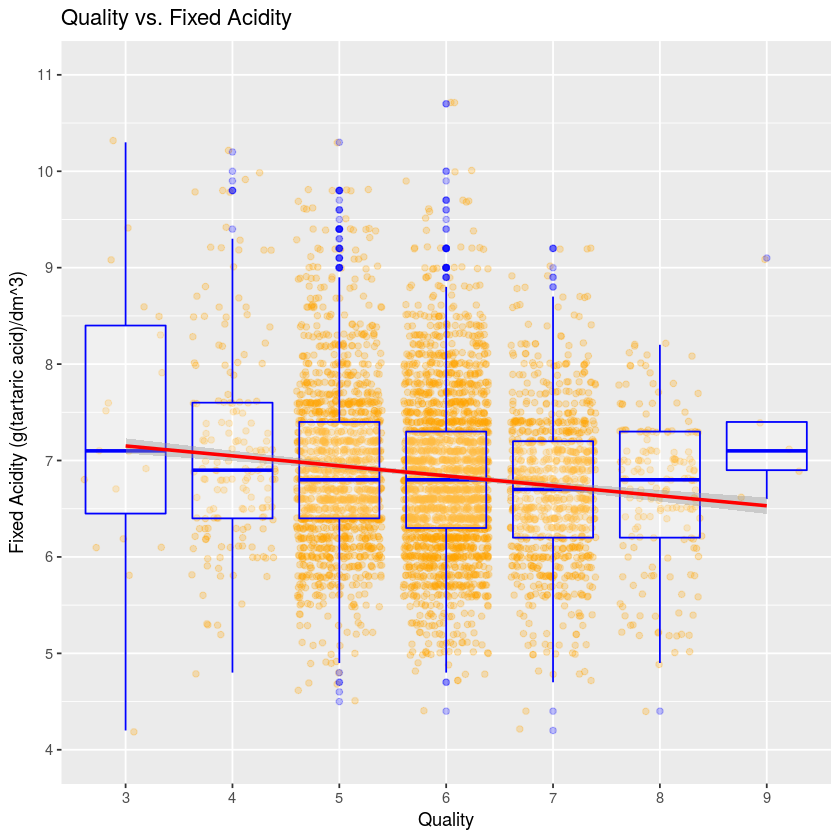

In [14]:
p2

#### Quality vs. Fixed Acidity Graph Analysis: Fixed acidity has a weak correlation to quality, and the slope of the regression line suggests that we shouldn't continue following this variable.

Warning message:
“Removed 14 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 14 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 17 rows containing missing values (geom_point).”

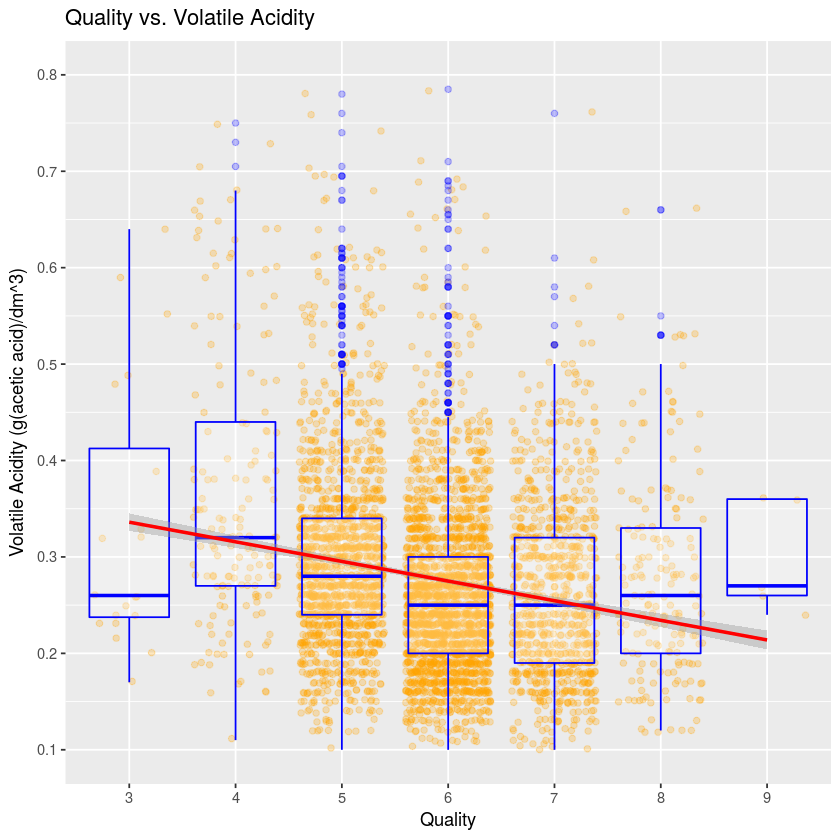

In [15]:
p3

#### Quality vs. Volatile Acidity Graph Analysis: Volatile acidity has a weak correlation to quality, but there is enough slope to the regression line that we should look closer at this variable.

Warning message:
“Removed 2 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 2 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 13 rows containing missing values (geom_point).”

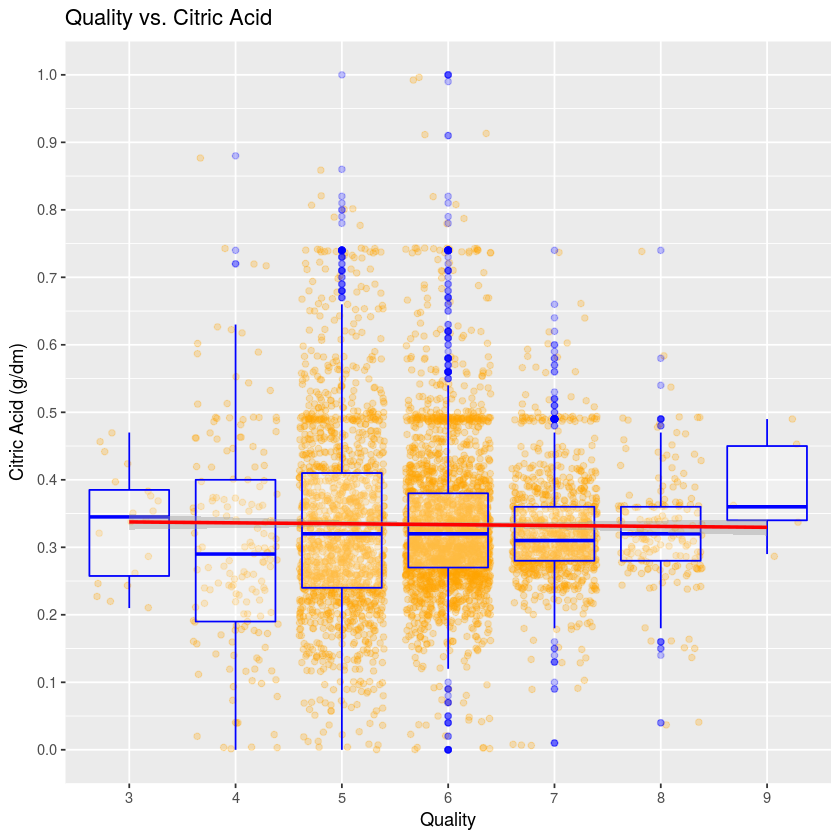

In [16]:
p4

#### Quality vs. Citric Acid Graph Analysis: Citric acid correlation is none or very weak to quality. This doesn't seem correct. It gives freshness & flavor to white wines. We'll need to look closer at this variable.


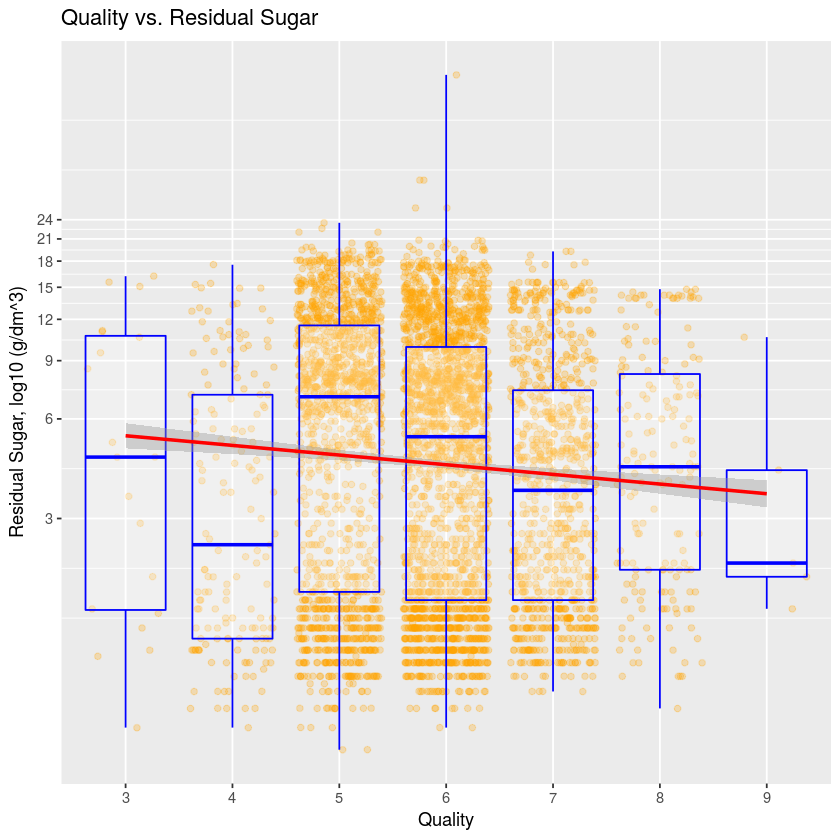

In [17]:
p5

#### Quality vs. Residual Sugar Graph Analysis: Residual sugar correlation is none or very weak to quality. This doesn't seem correct since both alcohol & density correlates well to quality. We should look closer at this variable, especially since, it's borderline for weak correlation.

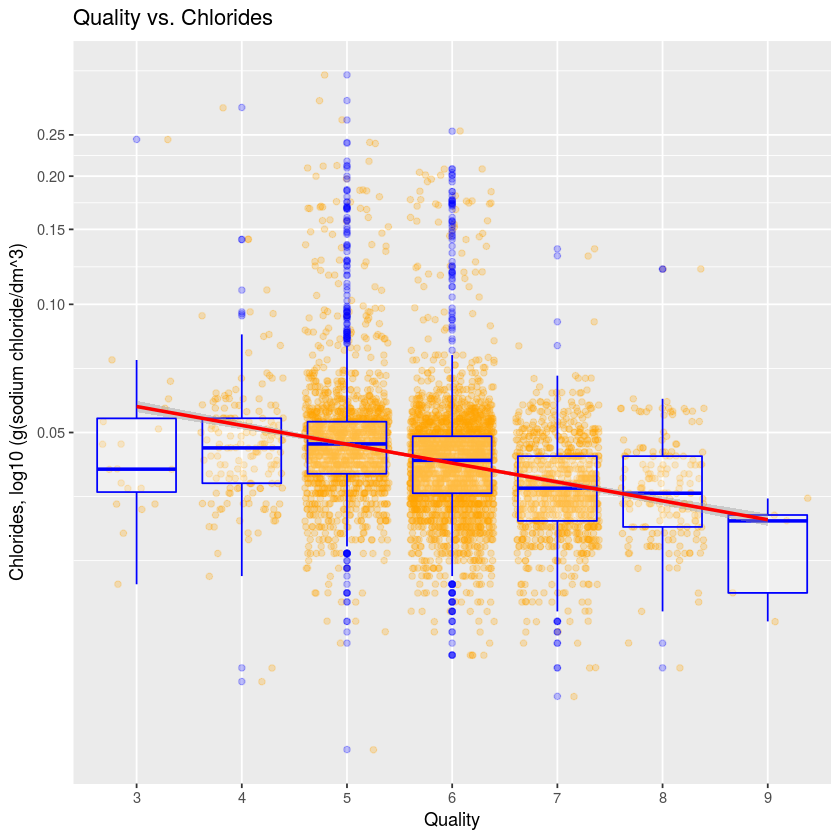

In [18]:
p6

#### Quality vs. Chloride Graph Analysis: Chloride correlation is weak to quality. Since the slope of the regression line covers a small a narrow range of chloride concentration, we should look closer at this variable.

Warning message:
“Removed 7 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 7 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 7 rows containing missing values (geom_point).”

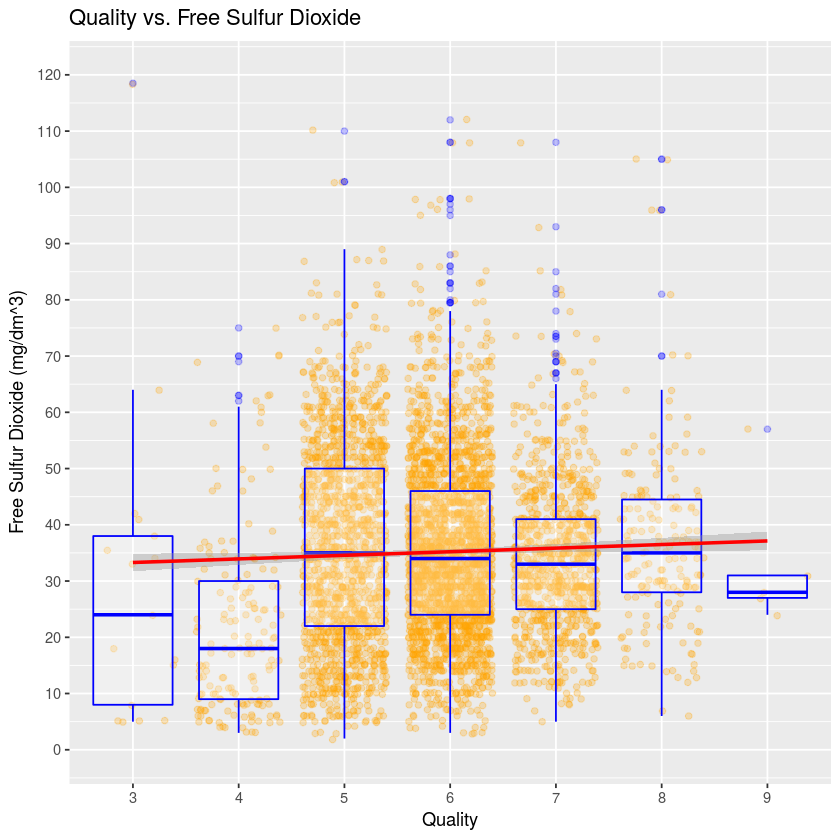

In [19]:
p7

#### Quality vs. Free Sulfur Dioxide Graph Analysis: Free sulfur dioxide correlation is none or very weak to quality. It prevents microbial growth and the oxidation of wine. We should look closer at this variable.

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

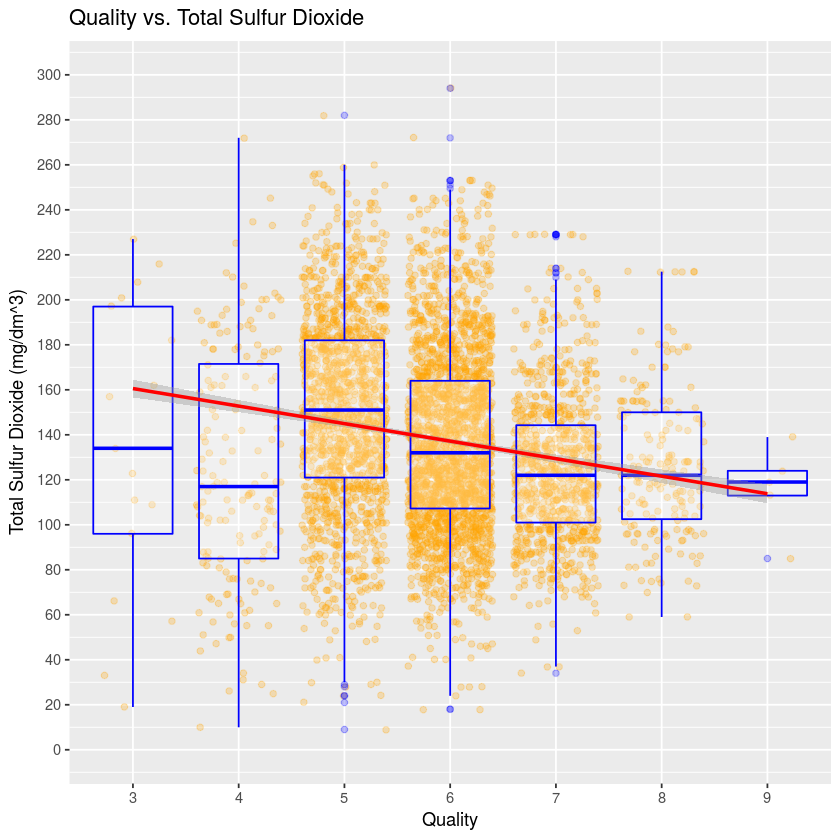

In [20]:
p8

#### Quality vs. Total Sulfur Dioxide Graph Analysis: Total sulfur dioxide correlation is none or very weak to quality. Sulfur dioxide helps to improve the taste and to retain the wine's fruity flavors and freshness of aroma. We should look closer at it.


Warning message:
“Removed 76 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 76 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 86 rows containing missing values (geom_point).”

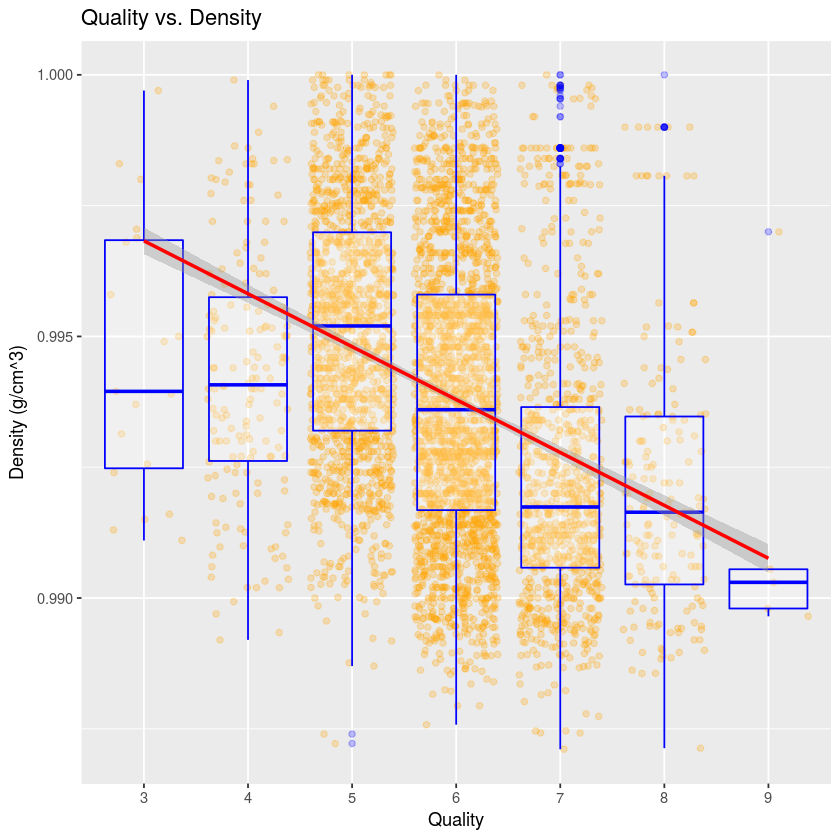

In [21]:
p9

#### Quality vs. Density Graph Analysis: Density correlation is moderate to quality. We should look closer at this variable since it's related to the residual sugar content, and the alcohol concentration.


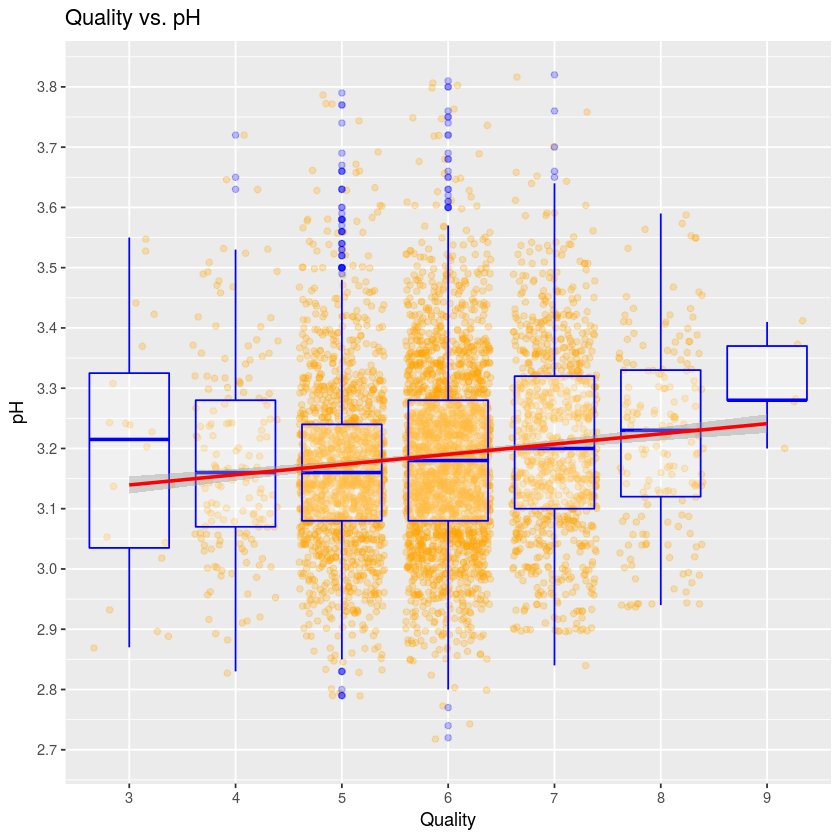

In [22]:
p10

#### Quality vs. pH Graph Analysis: pH correlation is none or very weak to quality.  It correlates with "freshness" (acidity) in the mouth. We should look closer at this variable, especially since, it's borderline for weak correlation.

Warning message:
“Removed 2 rows containing missing values (geom_point).”

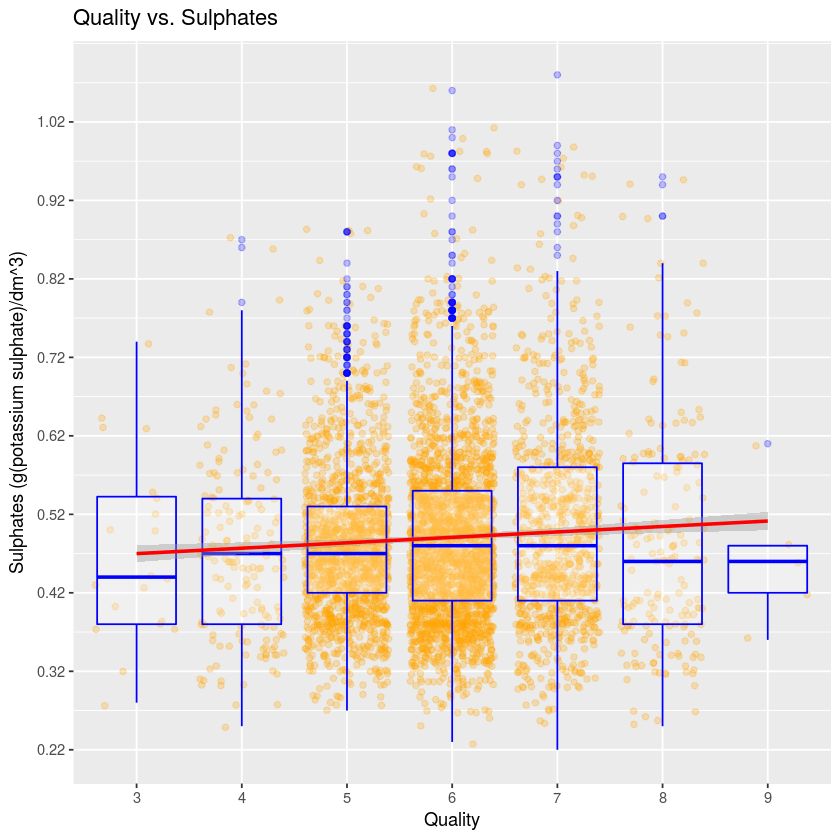

In [23]:
p11

#### Quality vs. Sulphates Graph Analysis: Sulphates correlation is none or very weak to quality. We should look closer at this variable.

Warning message:
“Removed 1 rows containing missing values (geom_point).”

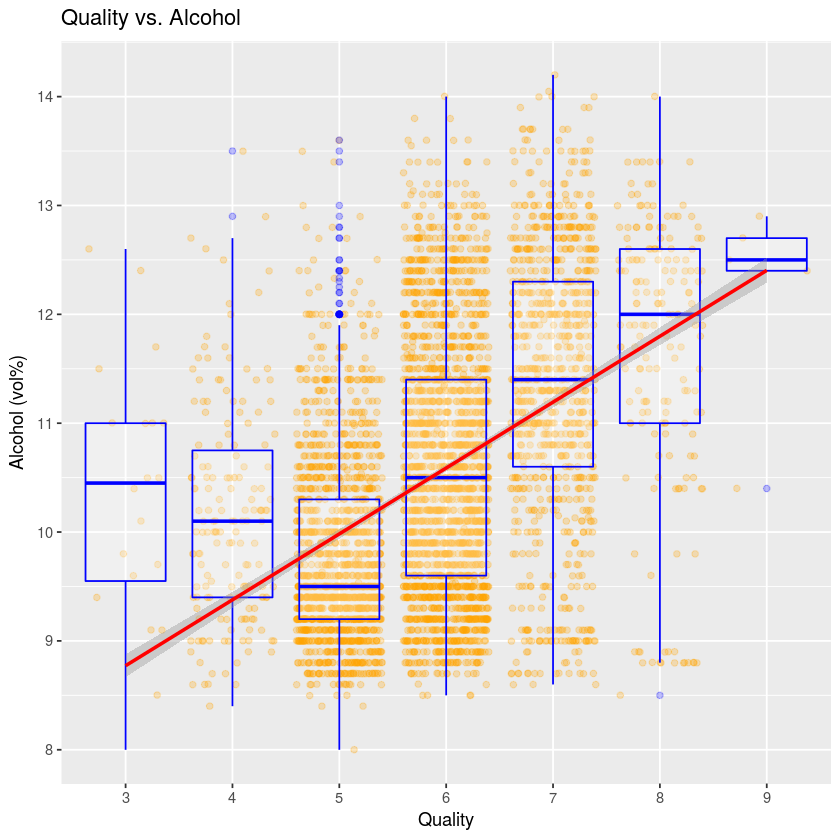

In [24]:
p12

#### Quality vs. Alcohol Graph Analysis: Alcohol correlation is strong to quality. We should look closer at this variable, and compare it to other variables.

### Analysis of Wine Quality with each Variable

Correlation for Wine Quality by Variable:
    - fixed.acidity is weak
    - volatile.acidity is weak
    - citric.acid is none or very weak
    - residual.sugar is none or very weak
    - chlorides is weak
    - free.sulfur.dioxide is none or very weak
    - total.sulfur.dioxide is weak
    - density is moderate
    - pH is none or very weak
    - sulphates is none or very weak
    - alcohol is strong

- Based on our grid graphs and correlation table, there is only one strong correlation -- alcohol has a strong correlation for wine quality.

- Density has a moderate correlation for wine quality.

- Fixed.acidity, volatile.acidity, chlorides, and total.sulfur.dioxide have weak correlations for wine quality.

- Citric.acid, residual.sugar, free.sulfur.dioxide, pH, and sulphates have none or very weak correlations with wine quality.

- Of importance, residual.sugar and pH are borderline for weak correlation for wine quality. We'll examine these two variables a little more closer in the next section.

### To answer our first question, it seems that alcohol has a strong influence on white wine quality. We'll definitely look closer at alcohol. Aside from the correlation table, our grid graphs suggest we should look closer at volatile acidity, residual sugar, chlorides, total sulfur dioxide, density, and pH. Interestingly, citric acid which would give freshness & flavor to white wines isn't correlated well. This doesn't seem right. We'll need to look here too.

# 3- Multivariate Plots and Analysis
## Understanding Correlation between Wine Variables, and Correlation between Wine Variables & Wine Rating

- Table: Correlation between each Chemical Variable

- Graphs: Plotting Wine Variables to each other and Wine Rating

    - Together they will give us a sense of which variables are influencing the wines the most.

For the correlation coefficient, we'll use Pearson's correlation coefficient. The correlation coefficient is a standard metric so that it always ranges from -1 (perfect negative correlation) to +1 (perfect positive correlation).

### Major Questions: 
### 2) Which variables have the strongest correlation between each other?
### 3) Which variables have the strongest correlation with wine rating?


## Correlation Table

In [25]:
# Correlation table for between each variable

table_var <- subset(whites, select = -c(X, quality, quality.cat))
cor(table_var, method = c('pearson'))


fixed.acidity volatile.acidity citric.acid residual.sugar
fixed.acidity         1.00000000   -0.02269729       0.28918070  0.08902070   
volatile.acidity     -0.02269729    1.00000000      -0.14947181  0.06428606   
citric.acid           0.28918070   -0.14947181       1.00000000  0.09421162   
residual.sugar        0.08902070    0.06428606       0.09421162  1.00000000   
chlorides             0.02308564    0.07051157       0.11436445  0.08868454   
free.sulfur.dioxide  -0.04939586   -0.09701194       0.09407722  0.29909835   
total.sulfur.dioxide  0.09106976    0.08926050       0.12113080  0.40143931   
density               0.26533101    0.02711385       0.14950257  0.83896645   
pH                   -0.42585829   -0.03191537      -0.16374821 -0.19413345   
sulphates            -0.01714299   -0.03572815       0.06233094 -0.02666437   
alcohol              -0.12088112    0.06771794      -0.07572873 -0.45063122   
                     chlorides   free.sulfur.dioxide total.sulfur.dioxide
fixed.acidity         0.02308564 -0.0493958591        0.091069756        
volatile.acidity      0.07051157 -0.0970119393        0.089260504        
citric.acid           0.11436445  0.0940772210        0.121130798        
residual.sugar        0.08868454  0.2990983537        0.401439311        
chlorides             1.00000000  0.1013923521        0.198910300        
free.sulfur.dioxide   0.10139235  1.0000000000        0.615500965        
total.sulfur.dioxide  0.19891030  0.6155009650        1.000000000        
density               0.25721132  0.2942104109        0.529881324        
pH                   -0.09043946 -0.0006177961        0.002320972        
sulphates             0.01676288  0.0592172458        0.134562367        
alcohol              -0.36018871 -0.2501039415       -0.448892102        
                     density     pH            sulphates   alcohol    
fixed.acidity         0.26533101 -0.4258582910 -0.01714299 -0.12088112
volatile.acidity      0.02711385 -0.0319153683 -0.03572815  0.06771794
citric.acid           0.14950257 -0.1637482114  0.06233094 -0.07572873
residual.sugar        0.83896645 -0.1941334540 -0.02666437 -0.45063122
chlorides             0.25721132 -0.0904394560  0.01676288 -0.36018871
free.sulfur.dioxide   0.29421041 -0.0006177961  0.05921725 -0.25010394
total.sulfur.dioxide  0.52988132  0.0023209718  0.13456237 -0.44889210
density               1.00000000 -0.0935914935  0.07449315 -0.78013762
pH                   -0.09359149  1.0000000000  0.15595150  0.12143210
sulphates             0.07449315  0.1559514973  1.00000000 -0.01743277
alcohol              -0.78013762  0.1214320987 -0.01743277  1.00000000

## Correlation Matrix

- The above correlation table is hard to interpret. We'll use a correlation matrix to clearly see the correlations between each variable.

- Positive correlations are displayed in blue and negative correlations in red color. Color intensity and the size of the circle are proportional to the correlation coefficients.

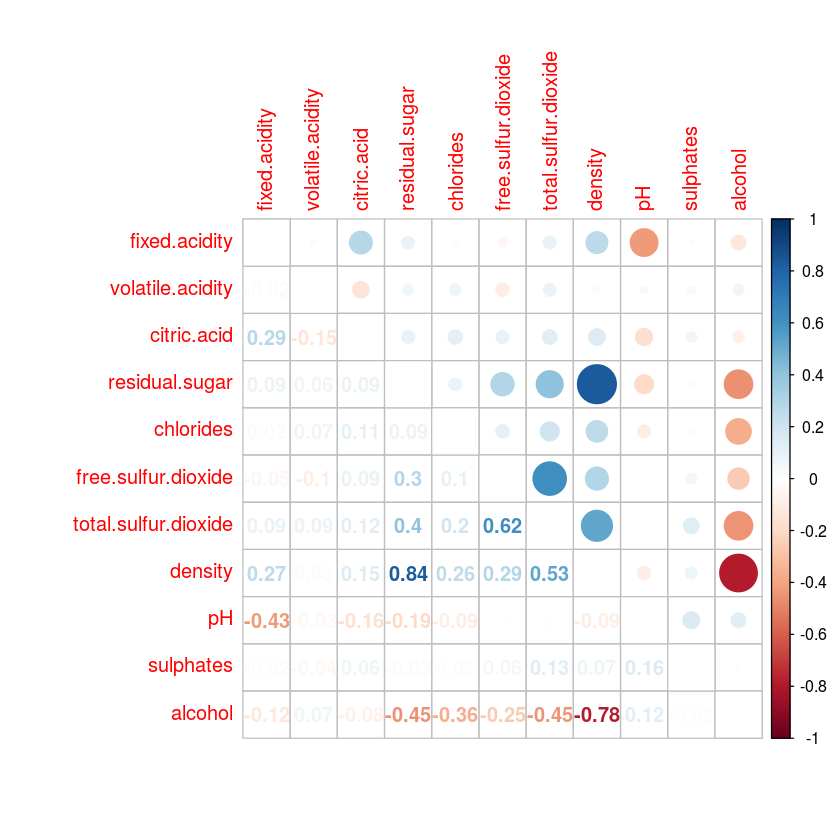

In [26]:
# Correlation Matrix

# Provide table_var to corr_table
corr_table <- cor(table_var)

# Plot correlation matrix with column labels
corrplot.mixed(corr_table, tl.pos = "lt")

#ggsave('White_Wine_Correlation.png') # Save table as a png file


## Analysis of Correlation Matrix

### Question 2: Which variables have the strongest correlation between each other?

#### Strong Correlations:
    - density & residual.sugar
    - density & total.sulfur.dioxide
    - total.sulfur.dioxide & free.sulfur.dioxide
    - alcohol & density
    
#### Moderate Correlations:
    - total.sulfur.dioxide & residual.sugar
    - free.sulfur.dioxide & residual.sugar
    - alcohol & residual.sugar
    - alcohol & chlorides
    - pH & fixed.acidy
    
### Alcohol and density had the best correlations with the other variables. We'll look at how these variables, and how others affect wine quality by regrouping the quality numbers to answer our third question.

### Regrouping the Wine Quality Variables to better understand their relationships
- Since the quality can be grouped by number, I'll categorize them by their value.

- Quality 0 -> 5 = Poor (n=1640) *Based on the numbers in 'Wine Quality by the Numbers"
- Quality 6 = Good (n=2198)
- Quality 7 -> 10 = Great (n=1060)


In [27]:
whites$rating[5 >= whites$quality ] = "Poor"
whites$rating[5< whites$quality & whites$quality < 7] = "Good"
whites$rating[7<= whites$quality ] = "Great"
whites$rating = as.factor(whites$rating)

whites$rating = relevel(whites$rating, "Poor")


In [28]:
table(whites$rating)



 Poor  Good Great 
 1640  2198  1060 

In [29]:
str(whites)

# rating has been added to our dataset

'data.frame':	4898 obs. of  15 variables:
 $ X                   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ fixed.acidity       : num  7 6.3 8.1 7.2 7.2 8.1 6.2 7 6.3 8.1 ...
 $ volatile.acidity    : num  0.27 0.3 0.28 0.23 0.23 0.28 0.32 0.27 0.3 0.22 ...
 $ citric.acid         : num  0.36 0.34 0.4 0.32 0.32 0.4 0.16 0.36 0.34 0.43 ...
 $ residual.sugar      : num  20.7 1.6 6.9 8.5 8.5 6.9 7 20.7 1.6 1.5 ...
 $ chlorides           : num  0.045 0.049 0.05 0.058 0.058 0.05 0.045 0.045 0.049 0.044 ...
 $ free.sulfur.dioxide : num  45 14 30 47 47 30 30 45 14 28 ...
 $ total.sulfur.dioxide: num  170 132 97 186 186 97 136 170 132 129 ...
 $ density             : num  1.001 0.994 0.995 0.996 0.996 ...
 $ pH                  : num  3 3.3 3.26 3.19 3.19 3.26 3.18 3 3.3 3.22 ...
 $ sulphates           : num  0.45 0.49 0.44 0.4 0.4 0.44 0.47 0.45 0.49 0.45 ...
 $ alcohol             : num  8.8 9.5 10.1 9.9 9.9 10.1 9.6 8.8 9.5 11 ...
 $ quality             : int  6 6 6 6 6 6 6 6 6 6 ...
 $ quality.cat  

Warning message:
“Removed 76 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 76 rows containing missing values (geom_point).”

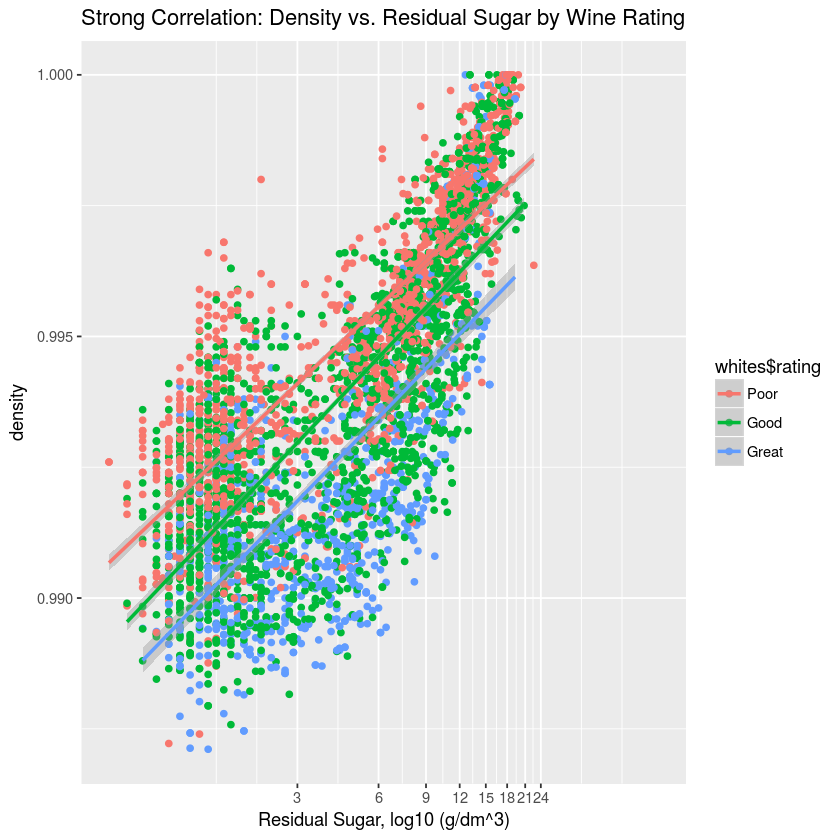

In [30]:
mv1 = ggplot(aes( x = residual.sugar, y = density, color = whites$rating), data = whites) +
    geom_point() + 
    r.s_lx2 + r.s_lxlab + # residual.sugar
    d_y + # density
    smooth_lm +
    ggtitle('Strong Correlation: Density vs. Residual Sugar by Wine Rating')

mv1

In [31]:
summary(whites$density)
summary(whites$residual.sugar)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9871  0.9917  0.9937  0.9940  0.9961  1.0390 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.600   1.700   5.200   6.391   9.900  65.800 

#### Question: Since density & residual sugar correlate well, how do they contribute to great wines?

#### MV1 Analysis:  Great whites have lower residual.sugar and lower densities. This make sense. As the density of the wines decreases, the sugar concentration is being converted into alcohol and carbon dioxide.

Warning message:
“Removed 81 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 81 rows containing missing values (geom_point).”

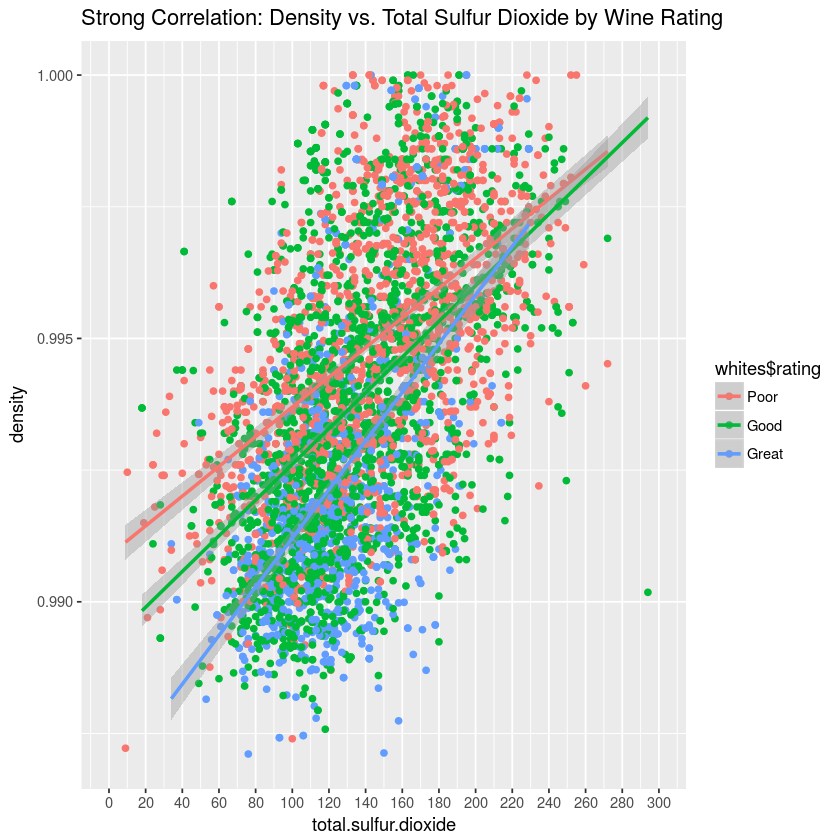

In [32]:
mv2 <- ggplot(aes( x = total.sulfur.dioxide, y = density, color = whites$rating), data = whites) +
    geom_point() + 
    t.s.d_x + # total.sulfur.dioxide
    d_y + # density
    smooth_lm +
    ggtitle('Strong Correlation: Density vs. Total Sulfur Dioxide by Wine Rating')

mv2

In [33]:
summary(whites$density)
summary(whites$total.sulfur.dioxide)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9871  0.9917  0.9937  0.9940  0.9961  1.0390 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    9.0   108.0   134.0   138.4   167.0   440.0 

#### How does density & total sulfur dioxide contribute to great wines?

#### MV2 Analysis: Great whites have lower total.sulfur.dioxide and lower densities. Sulfur dioxide is frequently added to wine as a preservative to prevent bacterial growth and to slow down the process of oxidation by inhibiting oxidative enzymes. It also improves the taste and retains the wine's fruity flavors and freshness of aroma. At lower concentrations, it contributes to the quality of the wine.


Warning message:
“Removed 10 rows containing missing values (geom_point).”

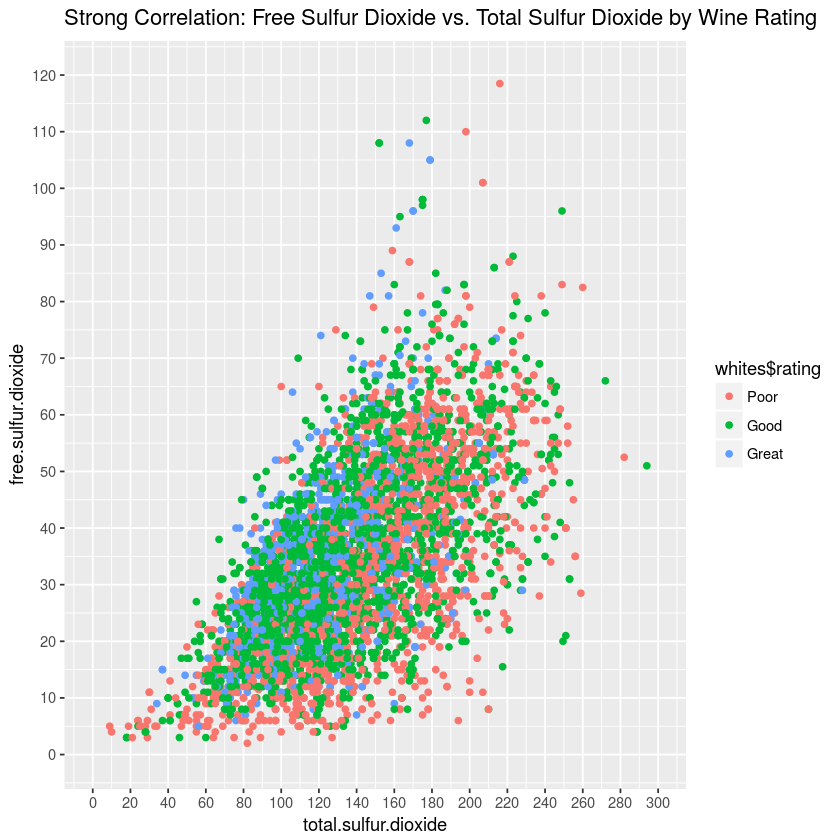

In [34]:
mv3 <- ggplot(aes( x = total.sulfur.dioxide, y = free.sulfur.dioxide, color = whites$rating), data = whites) +
    geom_point() +
    t.s.d_x + # total.sulfur.dioxide
    f.s.d_y + # free.sulfur.dioxide
    # smooth_lm +
    ggtitle('Strong Correlation: Free Sulfur Dioxide vs. Total Sulfur Dioxide by Wine Rating')

mv3

In [35]:
summary(whites$free.sulfur.dioxide)
summary(whites$total.sulfur.dioxide)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00   23.00   34.00   35.31   46.00  289.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    9.0   108.0   134.0   138.4   167.0   440.0 

#### Question: Would the ratio between total sulfur dioxide and free sulfur dioxide matter to wine quality?

#### MV3 Analysis: Great whites have total.sulfur.dioxide and free.sulfur.dioxide values that are near their mean values or a little lower. The free form of sulfur.dioxide can combine with compounds such as phenols, acetaldehyde and sugar to improve its taste and help retain the wine's fruity flavors and freshness of aroma. This is a very important to white wines. This graph shows that this balance is critical.


Warning message:
“Removed 76 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 76 rows containing missing values (geom_point).”

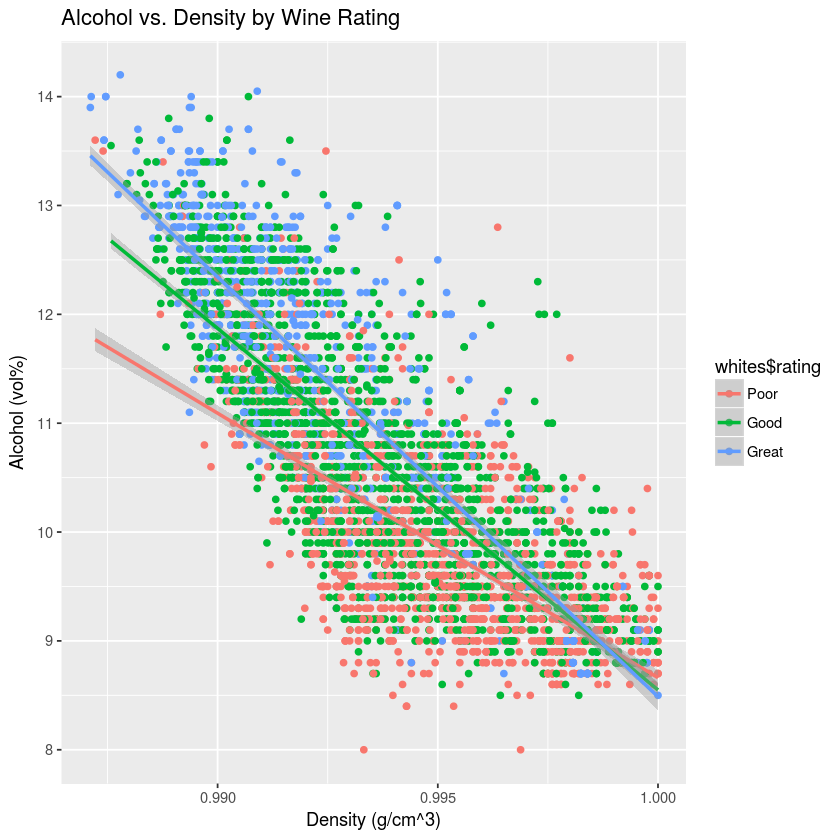

In [36]:
mv4 <- ggplot(aes( y = alcohol, x = density, color = whites$rating), data = whites) +
    geom_point() + 
    alc_y + alc_ylab + # alcohol 
    d_x +  d_xlab + # density
   smooth_lm +
    ggtitle('Alcohol vs. Density by Wine Rating')

mv4

In [37]:
summary(whites$alcohol)
summary(whites$density)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00    9.50   10.40   10.51   11.40   14.20 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.9871  0.9917  0.9937  0.9940  0.9961  1.0390 

#### Question: How does density contribute to alcohol in great wines?

#### MV4 Analysis: Most of the great wines are in quadrant 2 (the top left) of this graph. Great whites have lower densities and higher alcohol concentration. This makes sense. As the sugar concentration decreases, the alcohol content increases. Density is also related to the concentration of glycerol and tannins. The amount of glycerol produced varies with the type of yeast used, with sugar content and the grape variety. Tannins are a textural element that makes wine taste dry. They add both bitterness and astringency, as well as complexity. Density, as its related to alcohol, is a very complex wine characteristic, and it's important for wines to get this correct.


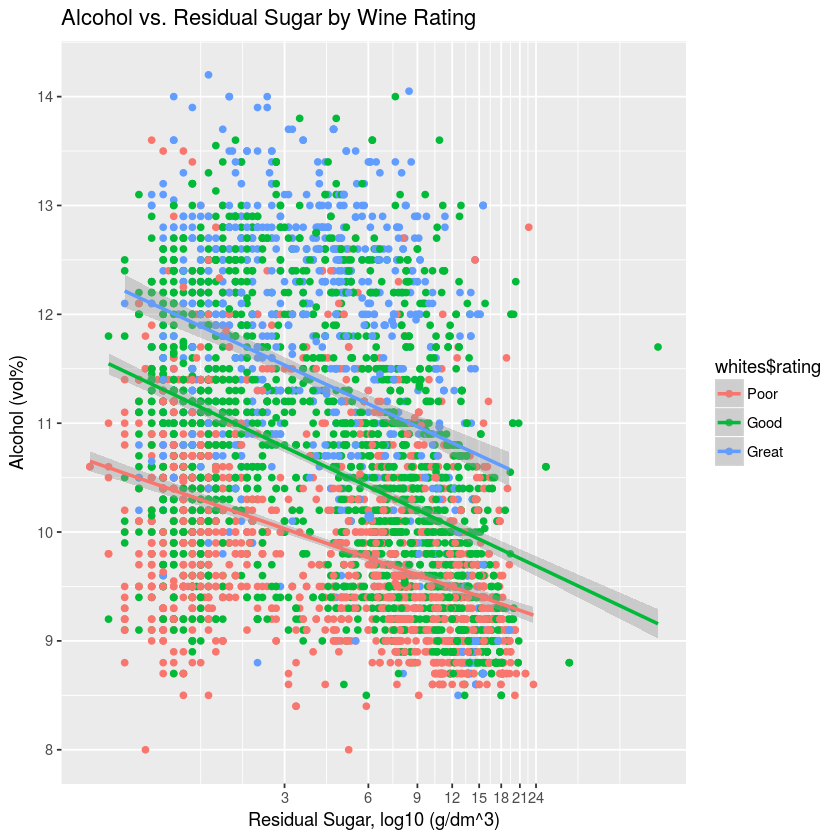

In [38]:
mv5 <- ggplot(aes( y = alcohol, x = residual.sugar, color = whites$rating), data = whites) +
    geom_point() + 
    alc_y + alc_ylab + # alcohol
    r.s_lx2 + r.s_lxlab + # density
   smooth_lm +
    ggtitle('Alcohol vs. Residual Sugar by Wine Rating')

mv5

In [39]:
summary(whites$alcohol)
summary(whites$residual.sugar)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00    9.50   10.40   10.51   11.40   14.20 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.600   1.700   5.200   6.391   9.900  65.800 

#### Question: Since density is important in great wines, we can imagine that residual sugar would be important to since they are related variables. How is residual sugar related to great wines?

#### MV5 Analysis: As the analysis shows, great whites have lower residual sugars and higher alcohol concentration. Just like the graph for density, most of the great wines are in quadrant 2 (the top left) in this graph.


Warning message:
“Removed 8 rows containing missing values (geom_smooth).”

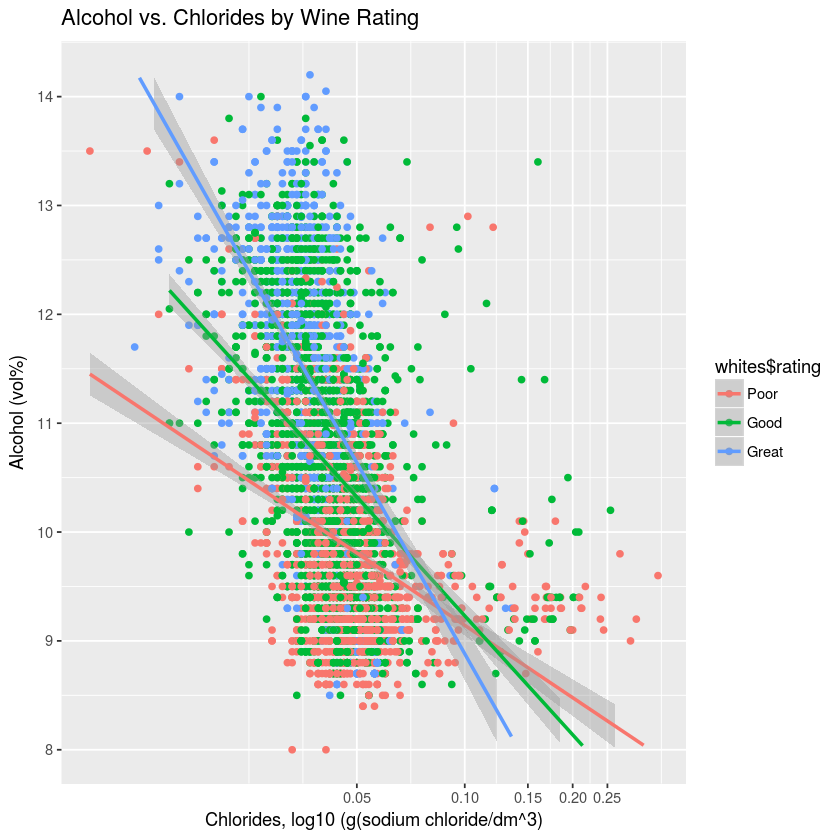

In [40]:
mv6 <- ggplot(aes( y = alcohol, x = chlorides, color = whites$rating), data = whites) +
    geom_point() + 
    alc_y + alc_ylab + # alcohol
    chl_lx2 + chl_lxlab + # density
   smooth_lm +
    ggtitle('Alcohol vs. Chlorides by Wine Rating')

mv6


In [41]:
summary(whites$alcohol)
summary(whites$chlorides)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00    9.50   10.40   10.51   11.40   14.20 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00900 0.03600 0.04300 0.04577 0.05000 0.34600 

#### Question: This there anyting we can learn from the chloride concentration in great wines?

#### MV6 Analysis: Chlorides don't seem to contribute to the quality of the wines. It appears that better wines do have higher alcohol content, but the better wines are spread across the whole spectrum of the chloride range. I'm pretty confident that this variable doesn't contribute to wine quality.

#### If our dataset included type of grape then perhaps we could get a better answer this relationship.

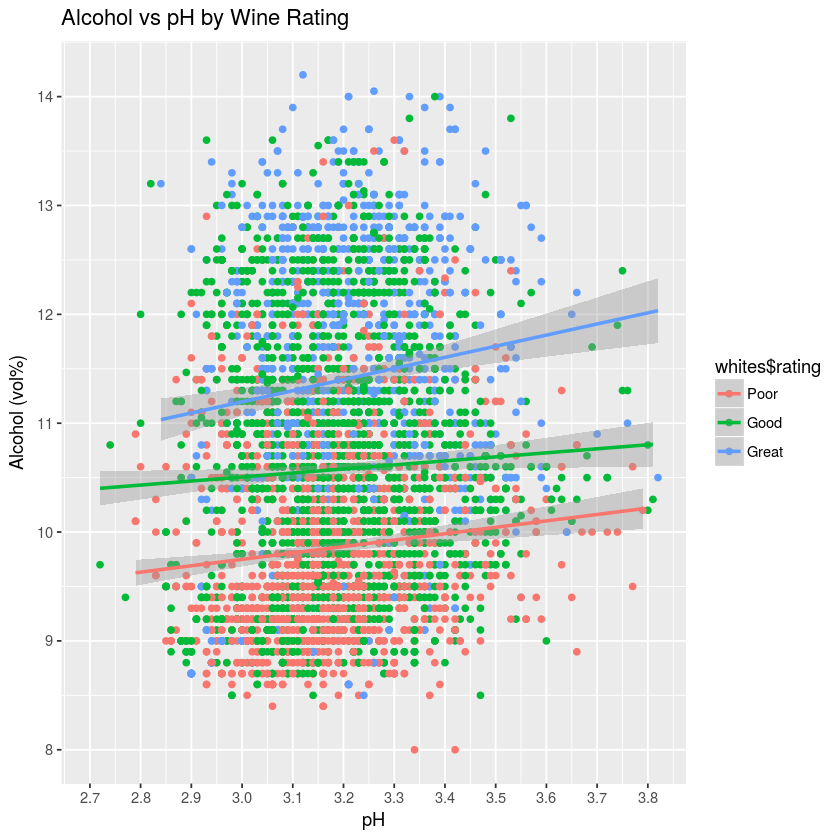

In [42]:
mv7 <- ggplot(aes( y = alcohol, x = pH, color = whites$rating), data = whites) +
    geom_point() + 
    alc_y + alc_ylab + # alcohol
    pH_x + # pH
   smooth_lm +
    ggtitle('Alcohol vs pH by Wine Rating')

mv7


In [43]:
summary(whites$alcohol)
summary(whites$pH)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   8.00    9.50   10.40   10.51   11.40   14.20 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.720   3.090   3.180   3.188   3.280   3.820 

#### MV7 Analysis: pH doesn't seem to contribute to the quality of the wines. It appears that better wines do have higher alcohol content, but the better wines are spread across the whole spectrum of the  pH range. I'm pretty confident that this variable doesn't contribute to wine quality.

#### If our dataset included type of grape then perhaps we could get a better answer this relationship.

Warning message:
“Removed 6 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

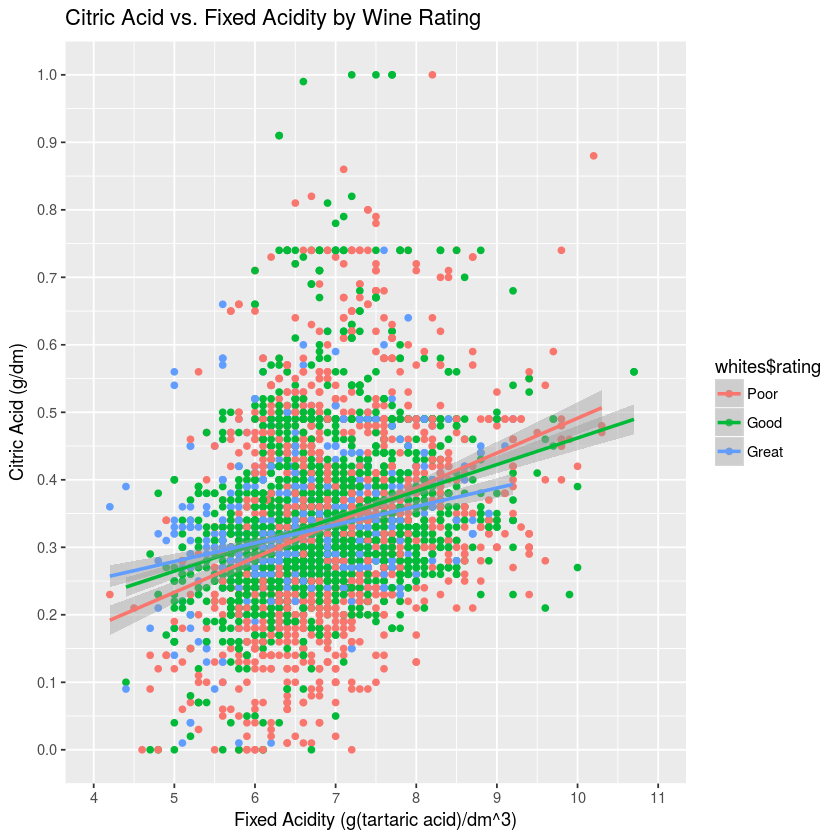

In [44]:
mv8 <- ggplot(aes( y = citric.acid, x = fixed.acidity, color = whites$rating), data = whites) +
    geom_point() + 
    c.a_y + c.a_ylab + # alcohol
    f.a_x + f.a_xlab + # density
   smooth_lm +
    ggtitle('Citric Acid vs. Fixed Acidity by Wine Rating')

mv8


In [45]:
summary(whites$citric.acid)
summary(whites$fixed.acidity)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2700  0.3200  0.3342  0.3900  1.6600 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.800   6.300   6.800   6.855   7.300  14.200 

#### Question: Earlier we learned that citric acid didn't correlate well with quality, but it did correlate moderately with fixed acidity, and it's known to add 'freshness' and flavor to wines. What is the relationship between citric acid and fixed acidity to great wines?

#### MV8 Analysis: The predominant fixed acids found in wines are tartaric, malic, citric, and succinic. These acids originate in grapes with the exception of succinic acid, which is produced by yeast during the fermentation process. Because of this, I wanted to group citric acid with fixed acidity. It would seem that great whites are best when the fixed acidity is near 5.5 g(tartaric acid)/dm^3 and when citric acid is near its mean value. While this isn't a great correlation, it would make sense that this might just be the sweet spot for where citric acid can add 'freshness' and flavor to wines making them great.

### Our 3rd Question: Which variables have the strongest correlation with wine rating?

The third question really deals with how do the variables influence wine ratings? That is to say, which variable have the strongest correlation with wine rating. The analysis revealed that density & residual sugar at lower concentrations affect wine quality -- as does density & total sulfur dioxide. The analysis also revealed that there is a balance between total sulfur dioxide & free sulfur dioxide. As for alcohol, alcohol & density and alcohol & residual sugar in the right balance produced great wines. The surprise was, citric acid & fixed acidity. Here there appeared to be a sweet spot for where citric acid adds freshness and flavor to the wine. This was a surprise because citric acid didn't correlate very well to quality.

# 4- Linear Model: Density and Residual Sugar

- I was interested in building a linear model (because we made an attempt in our class homework) based on the strong linear correlation between alcohol and density for white wines. I choose alcohol because it has the strongest correlation to the variables.

In [46]:
# dependent variable (dv) = alcohol
# independent variable (iv) = density
# m <- lm(dv ~ iv, data = mydata)

m1 <- lm((alcohol) ~ density, data = whites)
m2 <- update(m1, ~ . + residual.sugar)
m3 <- update(m2, ~ . + chlorides)
m4 <- update(m3, ~ . + free.sulfur.dioxide)
m5 <- update(m4, ~ . + total.sulfur.dioxide)
m6 <- update(m2, ~ . + pH)
mtable(m1, m2, m3, m4, m5, m6, sdigits = 3)


Calls:
m1: lm(formula = (alcohol) ~ density, data = whites)
m2: lm(formula = (alcohol) ~ density + residual.sugar, data = whites)
m3: lm(formula = (alcohol) ~ density + residual.sugar + chlorides, 
    data = whites)
m4: lm(formula = (alcohol) ~ density + residual.sugar + chlorides + 
    free.sulfur.dioxide, data = whites)
m5: lm(formula = (alcohol) ~ density + residual.sugar + chlorides + 
    free.sulfur.dioxide + total.sulfur.dioxide, data = whites)
m6: lm(formula = (alcohol) ~ density + residual.sugar + pH, data = whites)

============================================================================================================
                             m1            m2            m3            m4            m5            m6       
------------------------------------------------------------------------------------------------------------
  (Intercept)             329.588***    564.755***    544.341***    541.783***    553.803***    574.104***  
                           (3.657)       (5.365)       (5.626)       (5.601)       (6.050)       (5.200)    
  density                -320.991***   -558.645***   -537.841***   -535.144***   -547.395***   -571.670***  
                           (3.679)       (5.414)       (5.684)       (5.659)       (6.121)       (5.269)    
  residual.sugar                          0.167***      0.159***      0.161***      0.164***      0.180***  
                                         (0.003)       (0.003)       (0.003)       (0.003)       (0.003)    
  chlorides                                            -4.614***     -4.434***     -4.499***                
                                                       (0.425)       (0.423)       (0.422)                  
  free.sulfur.dioxide                                                -0.004***     -0.006***                
                                                                     (0.001)       (0.001)                  
  total.sulfur.dioxide                                                              0.002***                
                                                                                   (0.000)                  
  pH                                                                                              1.103***  
                                                                                                 (0.058)    
------------------------------------------------------------------------------------------------------------
  R-squared                 0.609         0.749         0.755         0.758         0.759         0.766     
  adj. R-squared            0.609         0.749         0.755         0.758         0.759         0.766     
  sigma                     0.770         0.617         0.609         0.606         0.604         0.595     
  F                      7613.412      7302.608      5023.805      3830.396      3085.806      5349.068     
  p                         0.000         0.000         0.000         0.000         0.000         0.000     
  Log-likelihood        -5668.571     -4580.851     -4522.614     -4491.739     -4478.376     -4405.754     
  Deviance               2902.572      1861.623      1817.875      1795.101      1785.333      1733.168     
  AIC                   11343.142      9169.703      9055.227      8995.477      8970.752      8821.508     
  BIC                   11362.632      9195.689      9087.710      9034.457      9016.228      8853.991     
  N                      4898          4898          4898          4898          4898          4898         
============================================================================================================

In [47]:
set.seed(1212) # use my bday as seed number
training_data <- sample_frac(whites, .6)
test_data <- whites[ !whites$X %in% training_data$X, ]

# fits a linear regression model which relates the six independent variable to the
# alcohol variable.

alc_model <- lm(alcohol ~ density + residual.sugar + chlorides +
                free.sulfur.dioxide + total.sulfur.dioxide + pH,
               data = whites)

alc_pred <- predict(alc_model, test_data)

alc_model # intercept, and estimated beta coefficients

summary(alc_model)


Call:
lm(formula = alcohol ~ density + residual.sugar + chlorides + 
    free.sulfur.dioxide + total.sulfur.dioxide + pH, data = whites)

Coefficients:
         (Intercept)               density        residual.sugar  
           5.659e+02            -5.631e+02             1.786e-01  
           chlorides   free.sulfur.dioxide  total.sulfur.dioxide  
          -3.501e+00            -6.621e-03             1.425e-03  
                  pH  
           1.063e+00  



Call:
lm(formula = alcohol ~ density + residual.sugar + chlorides + 
    free.sulfur.dioxide + total.sulfur.dioxide + pH, data = whites)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8208 -0.3963 -0.0409  0.3341 15.5628 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           5.659e+02  5.885e+00  96.158  < 2e-16 ***
density              -5.631e+02  5.978e+00 -94.193  < 2e-16 ***
residual.sugar        1.786e-01  3.275e-03  54.529  < 2e-16 ***
chlorides            -3.501e+00  4.117e-01  -8.504  < 2e-16 ***
free.sulfur.dioxide  -6.621e-03  6.352e-04 -10.423  < 2e-16 ***
total.sulfur.dioxide  1.425e-03  2.862e-04   4.980 6.59e-07 ***
pH                    1.063e+00  5.740e-02  18.520  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.584 on 4891 degrees of freedom
Multiple R-squared:  0.775,	Adjusted R-squared:  0.7748 
F-statistic:  2808 on 6 and 4891 DF,  p-value: < 2.2e-16


#### Linear Model Analysis: Evaluating the performance (the fit) of our model:

Our Multiple R-squared value (also called the coefficient of determination) provides a measure of how well our model as a whole explains the values of the dependent variable, alcohol. It is similar to the correlation coefficient in that the closer the value is to 1.0, the better the model perfectly explains the data. Since the R-squared value for this model is 0.7748, we know that 77 percent of the variation in the dependent variable is explained by the model.

Additionally, the three-star significance level of 0 (zero) means that the variable is extremely unlikely to be unrelated to the dependent variable.

# 5- Final Plots and Summary
## Final Three Plots

### Plot One: The Quality of the White Wine Dataset

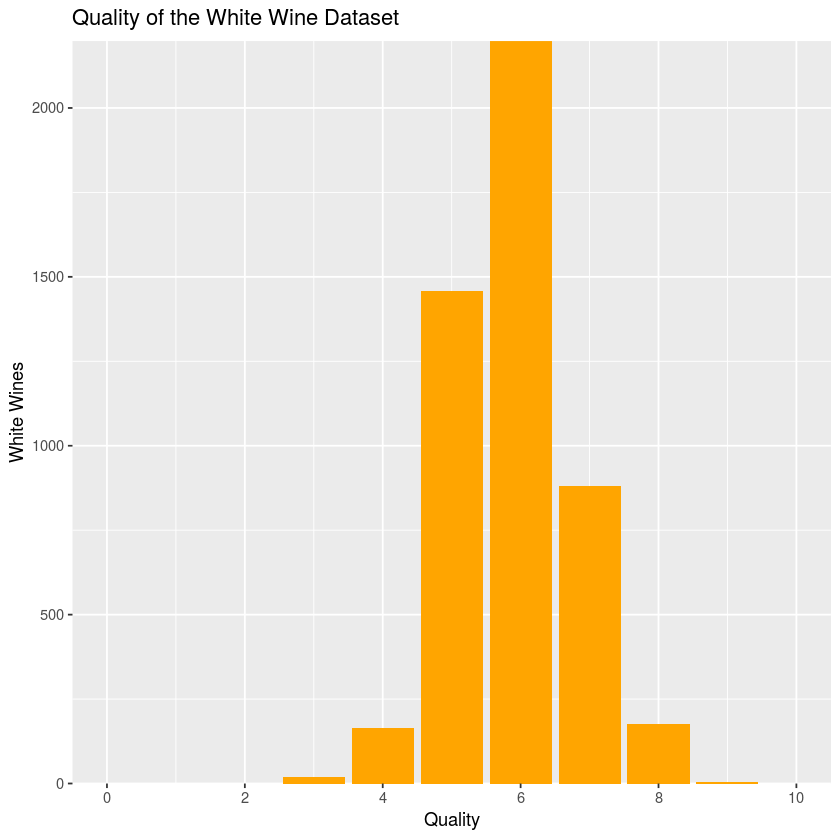

In [48]:
ggplot(aes(quality), data = whites) + geom_bar(fill = 'orange') +
    scale_x_continuous(limits = c(0, 10), 'Quality', breaks = seq(0, 10, by = 2)) +
    scale_y_continuous(expand = c(0, 0), 'White Wines') + 
    ggtitle('Quality of the White Wine Dataset')


### Plot One Analysis: This plot conveys a great deal of information. It nicely defines the quality of the wines, and quickly gives you a sense of how many wines there are for each quality.

### Plot Two: Citric Acid vs. Fixed Acidity by Wine Rating

Warning message:
“Removed 6 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

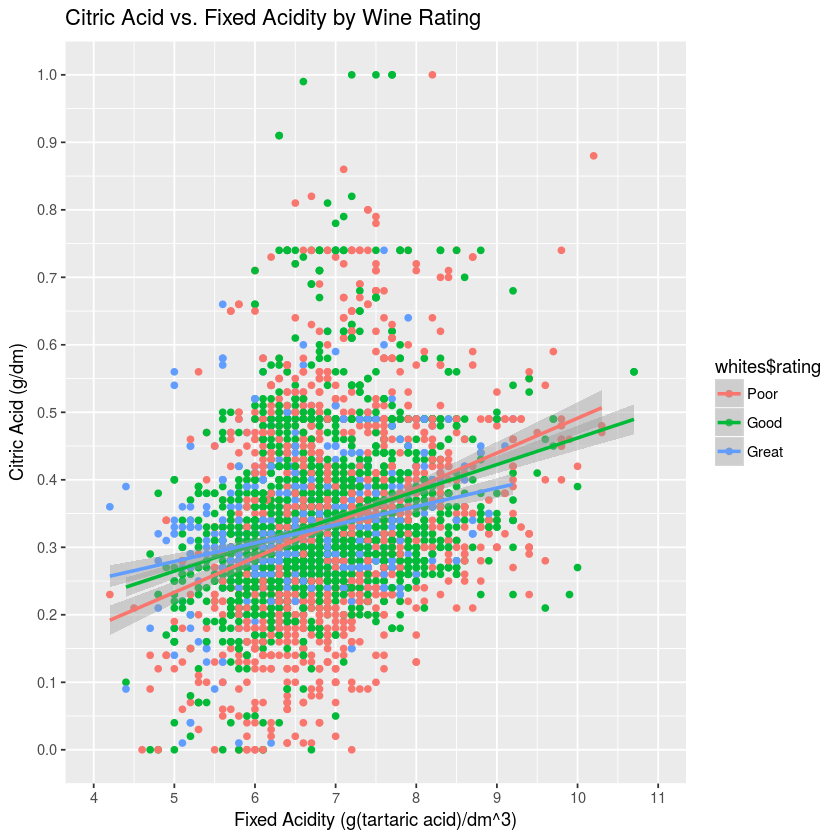

In [49]:
ggplot(aes( y = citric.acid, x = fixed.acidity, color = whites$rating), data = whites) +
    geom_point() + 
    c.a_y + c.a_ylab + # alcohol
    f.a_x + f.a_xlab + # density
   smooth_lm +
    ggtitle('Citric Acid vs. Fixed Acidity by Wine Rating')

### Plot two analysis: I plotted this graph again because I feel strongly about this hidden sweet spot. There appears to be a sweet spot for where citric acid adds freshness and flavor to the wine. This was a surprise because citric acid didn't correlate very well to quality.

### Plot Three: Alcohol vs. Residual Sugar by Wine Rating

Warning message:
“Removed 5 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 5 rows containing missing values (geom_point).”

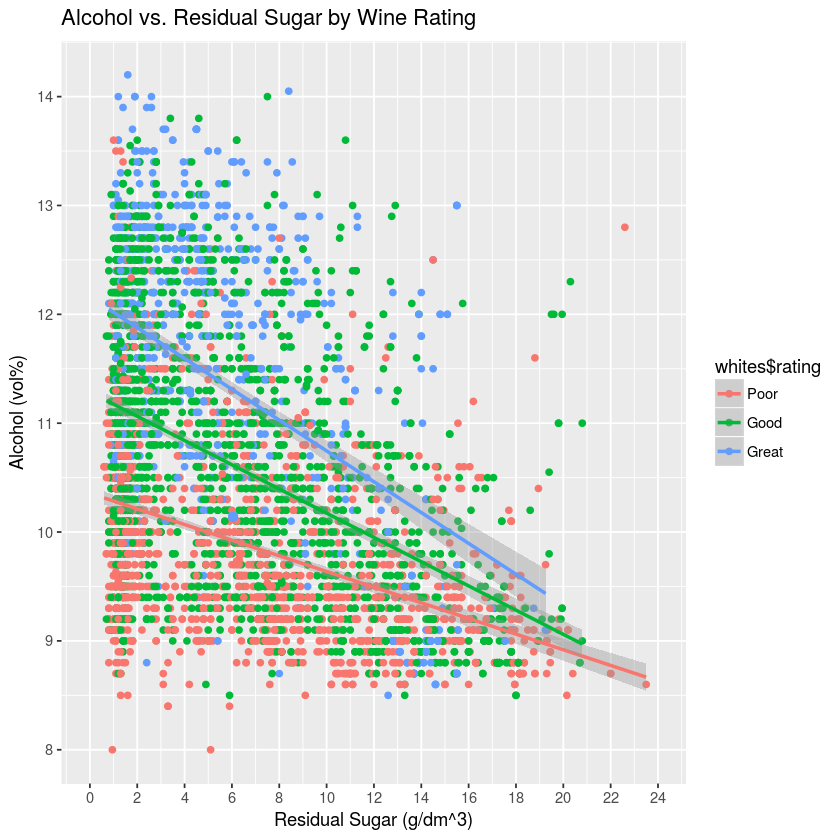

In [50]:
ggplot(aes( y = alcohol, x = residual.sugar, color = whites$rating), data = whites) +
    geom_point() + 
    alc_y + alc_ylab + # alcohol
    r.s_x + r.s_xlab + # density
   smooth_lm +
    ggtitle('Alcohol vs. Residual Sugar by Wine Rating')


### Plot Three Analysis: Residual sugar refers to any remaining sugar leftover after the fermentation stops. This graph illustrates that the best white wines have lower residual sugar and relatively high alcohol content. For a white wine, I would have to say that residual sugar is very important to wine quality because it correlates well to alcohol, and alcohol is correlated well to the other variables. So when you combine the residual sugar levels, the citric acid levels, along with the sulfur dioxide levels, you begin to see what makes a great white wine.


# Summary and Reflection

When I started out on this project, I picked white wines because it had the largest dataset. During the analysis, I began to doubt my pick. It seemed that there wasn't many strong correlations to work with. Alcohol was the only strong correlation. At this point, I decided that I would work with the dataset, but that I would let the data drive the analysis. So this is how this analysis started.

During the way, I discovered that there were in fact other hidden correlations to be found. For example, citric acid didn't correlate well with quality, but with fixed acidity there appeared to be a sweet spot between them for great wines. This was truly an eye opener for me. Additionally, along the way, I learned that alcohol and density are important factors for quality white wines. If I had to rate them, I would have to say that alcohol seemed to have played a greater role than density. It seemed to correlate better. I learned that total sulfur dioxide & free sulfur dioxide seemed to strike a necessary balance to help retain a wine's fruity flavor and freshness of aroma.

And finally, while I made an attempt to model a simple linear regression for alcohol (I wanted to do this because we did it in our homework), I realized that this analysis would have been better if I could have been able to rank the variables according to their importance to wine quality. While this is a limitation on my part, it will only be a temporary limitation as I plan to learn how to do this. This analysis opened my eyes to the importance of being able to model your analysis.

The last limitation I want to mention is that this dataset had only 11 input variables, but the most important one may have been left out. It would've been nice to have known the grapes the wines were produced from as this would have added an extra layer for the analysis, and may have provided a clearer explanation for some of the correlations.


## References:

- Bruce, Peter and Andrew Bruce. Practical Statistics for Data Science. Sebastopol: O'Reilly Media, Inc., 2017. Print

- Wickham, Hadley and Garrett Grolemund. R for Data Science. Sebastopol: O'Reilly Media, Inc., 2017. Print

- Wickham, Hadley. ggplot2. AG Switzerland: Springer, 2016. Print

- Lantz, Brett. Machine Learning with R. Birmingham: Packt Publishing Ltd, 2013. Print

- Class lecture notes, homework assignments, and quizzes.

### Wine Dataset: 

- P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

### Code for polished Jupyter presentations
http://chris-said.io/2016/02/13/how-to-make-polished-jupyter-presentations-with-optional-code-visibility/



### Ken Garbutt, November 2017